**Hybrid NLP Approach for Enhancing Airline Tweet Sentiment Classification Using TF-IDF and RoBERTa Embeddings**

In [ ]:
import pandas as pd
import zipfile

with zipfile.ZipFile("/content/archive (4).zip", "r") as zip_ref:
    zip_ref.extractall("/content")

# Load the CSV file
df = pd.read_csv("/content/Tweets.csv", encoding='latin-1')

# View structure
print("Dataset loaded successfully!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
df.head()


Dataset loaded successfully!
Shape: (14640, 15)
Columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [ ]:
df = df[['text', 'airline_sentiment']]
df = df.rename(columns={'airline_sentiment': 'label'})

print("\nCleaned dataset preview:")
print(df['label'].value_counts())
df.head()



Cleaned dataset preview:
label
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


text     label
0                @VirginAmerica What @dhepburn said.   neutral
1  @VirginAmerica plus you've added commercials t...  positive
2  @VirginAmerica I didn't today... Must mean I n...   neutral
3  @VirginAmerica it's really aggressive to blast...  negative
4  @VirginAmerica and it's a really big bad thing...  negative

**EDA**

In [ ]:
# Install libs for EDA / visualization
!pip install wordcloud matplotlib seaborn nltk scikit-learn --quiet

# Download NLTK data
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

print("Libraries installed and NLTK data ready.")


Libraries installed and NLTK data ready.


In [ ]:
import os
import pandas as pd

# Try common locations for Tweets.csv
candidates = [
    "Tweets.csv",
    "/content/Tweets.csv",
    "Tweets .csv",
    "/content/Tweets .csv"
]

found = None
for p in candidates:
    if os.path.exists(p):
        found = p
        break

# If not found, try to find any CSV with 'Tweet' in name (uploaded zip extracted)
if found is None:
    for f in os.listdir("/content"):
        if f.lower().endswith(".csv") and "tweet" in f.lower():
            found = os.path.join("/content", f)
            break

if found is None:
    raise FileNotFoundError("Tweets.csv not found. Please upload Tweets.csv to Colab or unzip your archive into /content.")

print("Loading dataset from:", found)
df = pd.read_csv(found, encoding='latin-1', low_memory=False)
print("Initial shape:", df.shape)
df.head(3)


Loading dataset from: Tweets.csv
Initial shape: (14640, 15)


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                        0.0  Virgin America   
2            NaN                        NaN  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)

Columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativ

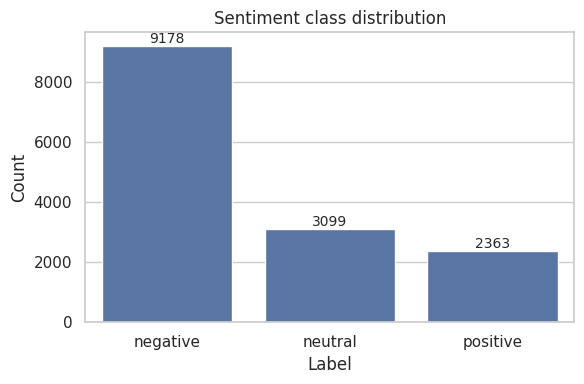

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Show columns and a concise summary
print("Columns:", list(df.columns))
print("\nInfo:")
print(df.info())

if 'airline_sentiment' in df.columns:
    df = df.rename(columns={'airline_sentiment':'label'})
elif 'sentiment' in df.columns:
    df = df.rename(columns={'sentiment':'label'})

if 'text' in df.columns and 'label' in df.columns:
    df = df[['text','label']].copy()
else:
    raise RuntimeError("Expected columns 'text' and 'label' (or 'airline_sentiment'). Found: " + ", ".join(df.columns))

# missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# duplicates
dups = df.duplicated().sum()
print(f"\nDuplicate rows: {dups}")

# class distribution
print("\nClass distribution:")
print(df['label'].value_counts())

# plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index)
plt.title("Sentiment class distribution")
plt.xlabel("Label")
plt.ylabel("Count")
for p in plt.gca().patches:
    plt.gca().annotate(int(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
import random
random.seed(42)

print("Sample tweets by class:\n")
for lbl in df['label'].unique():
    print(f"--- {lbl} (example) ---")
    sample = df[df['label']==lbl]['text'].dropna().sample(3, random_state=42).values
    for s in sample:
        print("-", s.replace("\n"," "))
    print()


Sample tweets by class:

--- neutral (example) ---
- @united we finally just arrive to Bogota, good but long flight!!
- @AmericanAir got a callback at 1 am, took care of it. thanks.
- @JetBlue is there wifi on he plain

--- positive (example) ---
- @SouthwestAir thanks for your excellent response time and assistance! All set :)
- @JetBlue thanks. I appreciate your prompt response.
- @JetBlue yes, with about 20 minutes to spare.  FYI - your employees are amazing.  Keep up the good work!

--- negative (example) ---
- @united gate C 24 IAD. U released passengers to board w/others deplaning .50 peopleOn bridge while next flight  board http://t.co/HfoF33iyhi
- @USAirways 1729 connecting in charlotte to houston. Mechanical issue determined while q'd to take off. And we checked our bags.
- @united installed and working are not the same. Kicked me out after an hour and wouldn't let me back in. Four wasted hours.



       raw_len_chars  raw_len_words
count   14640.000000   14640.000000
mean      104.118511      17.654235
std        36.256550       6.882132
min        12.000000       2.000000
25%        77.000000      12.000000
50%       115.000000      19.000000
75%       136.000000      23.000000
max       229.000000      36.000000


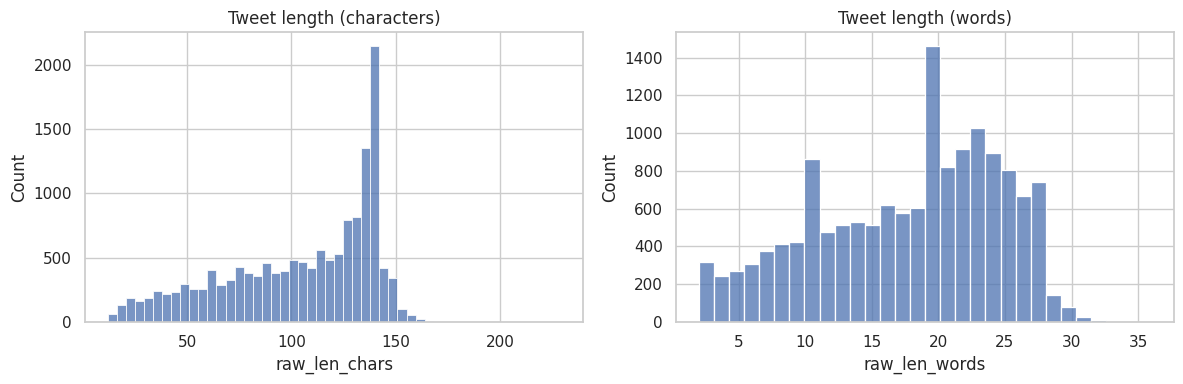

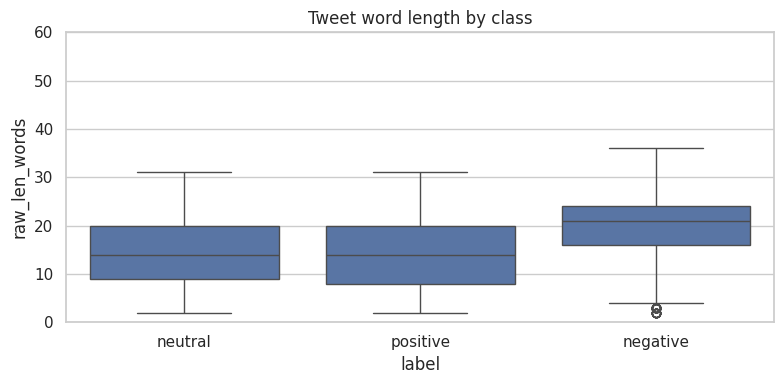

In [ ]:
# compute lengths
df['raw_len_chars'] = df['text'].str.len()
df['raw_len_words'] = df['text'].str.split().map(len)

print(df[['raw_len_chars','raw_len_words']].describe())

# histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df['raw_len_chars'], bins=50, kde=False)
plt.title("Tweet length (characters)")
plt.subplot(1,2,2)
sns.histplot(df['raw_len_words'], bins=30, kde=False)
plt.title("Tweet length (words)")
plt.tight_layout()
plt.show()

# boxplot by class
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='raw_len_words', data=df)
plt.title("Tweet word length by class")
plt.ylim(0, 60)   # limit to remove extreme outliers for clearer view
plt.tight_layout()
plt.show()


In [ ]:
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def simple_clean(text):
    if pd.isna(text):
        return ""
    s = str(text)
    s = s.lower()
    # remove URLs
    s = re.sub(r'http\S+|www\.\S+', ' ', s)
    # remove mentions and hashtags symbols
    s = re.sub(r'@\w+', ' ', s)
    s = re.sub(r'#', ' ', s)
    # remove punctuation except apostrophes
    s = re.sub(r"[^a-z0-9\s']", ' ', s)
    # collapse repeated whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    return s

# apply cleaning and compute cleaned lengths
df['clean'] = df['text'].apply(simple_clean)
df['clean_len_words'] = df['clean'].str.split().map(len)

print(df[['text','clean']].head(5))
print("\nClean length summary:")
print(df['clean_len_words'].describe())


                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                               clean  
0                                          what said  
1  plus you've added commercials to the experienc...  
2  i didn't today must mean i need to take anothe...  
3  it's really aggressive to blast obnoxious ente...  
4           and it's a really big bad thing about it  

Clean length summary:
count    14640.000000
mean        16.522404
std          7.038245
min          1.000000
25%         11.000000
50%         18.000000
75%         22.000000
max         34.000000
Name: clean_len_words, dtype: float64


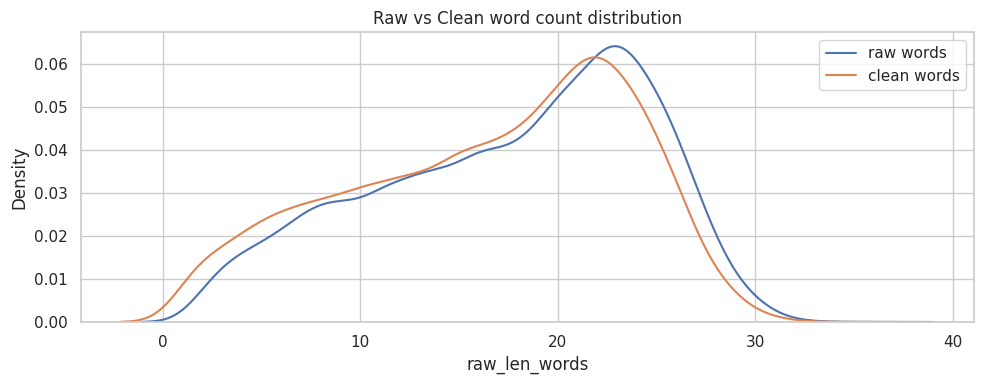

In [ ]:
plt.figure(figsize=(10,4))
sns.kdeplot(df['raw_len_words'], label='raw words')
sns.kdeplot(df['clean_len_words'], label='clean words')
plt.title("Raw vs Clean word count distribution")
plt.legend()
plt.tight_layout()
plt.show()


**Bigrams versus Unigrams**

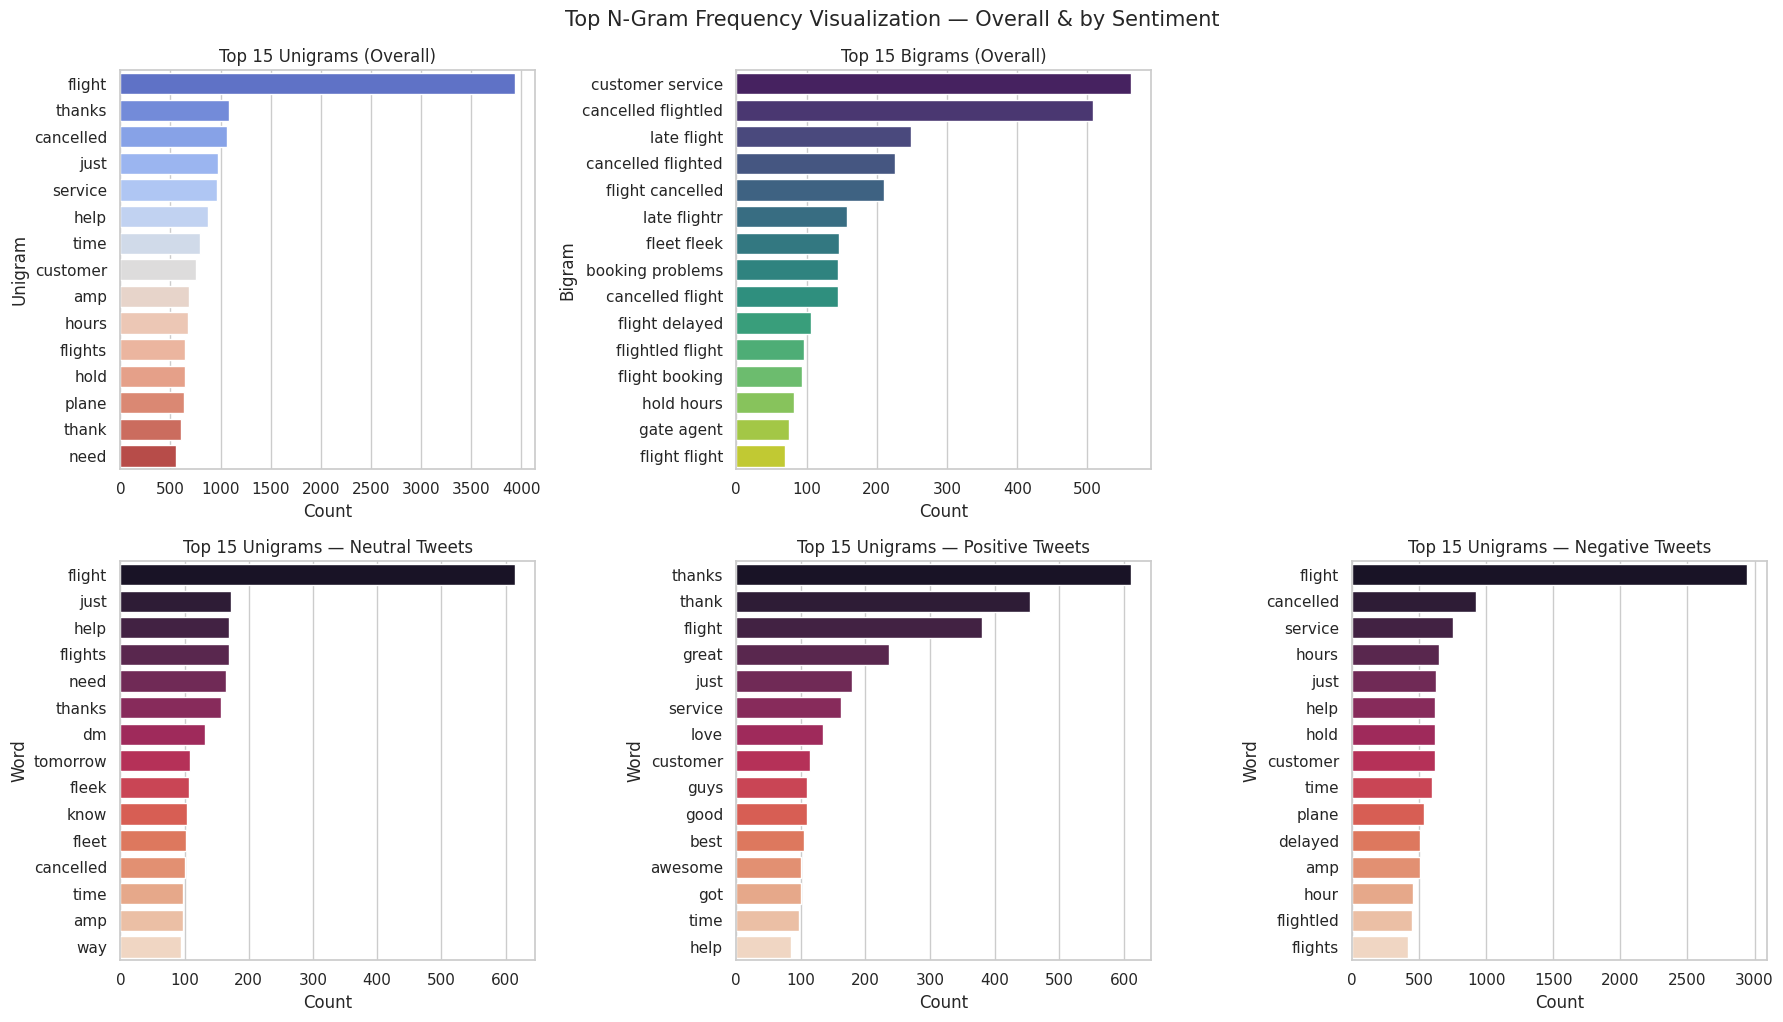

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ---- function for top n-grams ----
def top_n_grams(corpus, ngram_range=(1,1), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english', min_df=2).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# ---- overall unigrams and bigrams ----
top_uni = top_n_grams(df['clean'], (1,1), 15)
top_bi = top_n_grams(df['clean'], (2,2), 15)

# convert to DataFrames
uni_df = pd.DataFrame(top_uni, columns=['word','count'])
bi_df = pd.DataFrame(top_bi, columns=['word','count'])

# ---- Prepare class-specific top words ----
class_data = []
for lbl in ['neutral', 'positive', 'negative']:  # fixed consistent order
    if lbl in df['label'].unique():
        top_class = top_n_grams(df[df['label']==lbl]['clean'], (1,1), 15)
        class_df = pd.DataFrame(top_class, columns=['word','count'])
        class_data.append((lbl, class_df))

# ---- Plot everything on one page (2 rows: overall row + per-class row) ----
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# === Row 1 === #
# overall unigrams
sns.barplot(x='count', y='word', data=uni_df, hue='word', legend=False, palette='coolwarm', ax=axes[0])
axes[0].set_title("Top 15 Unigrams (Overall)")
axes[0].set_xlabel("Count"); axes[0].set_ylabel("Unigram")

# overall bigrams
sns.barplot(x='count', y='word', data=bi_df, hue='word', legend=False, palette='viridis', ax=axes[1])
axes[1].set_title("Top 15 Bigrams (Overall)")
axes[1].set_xlabel("Count"); axes[1].set_ylabel("Bigram")

# leave third plot in first row blank (for clean layout)
axes[2].axis('off')

# === Row 2 === #
for i, (lbl, class_df) in enumerate(class_data):
    ax_idx = i + 3  # start filling from second row
    sns.barplot(x='count', y='word', data=class_df, hue='word', legend=False, palette='rocket', ax=axes[ax_idx])
    axes[ax_idx].set_title(f"Top 15 Unigrams — {lbl.capitalize()} Tweets")
    axes[ax_idx].set_xlabel("Count"); axes[ax_idx].set_ylabel("Word")

# Hide any unused subplot spaces
for j in range(len(class_data)+3, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Top N-Gram Frequency Visualization — Overall & by Sentiment", fontsize=15, y=1.02)
plt.show()


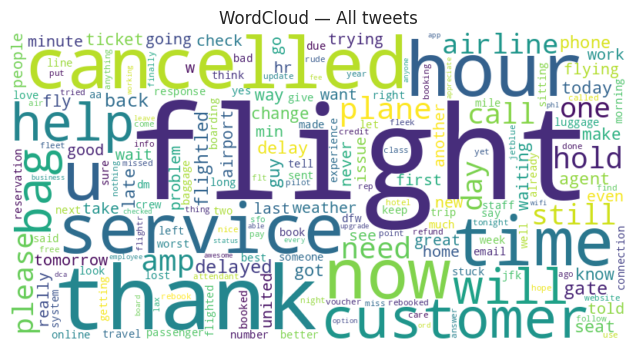

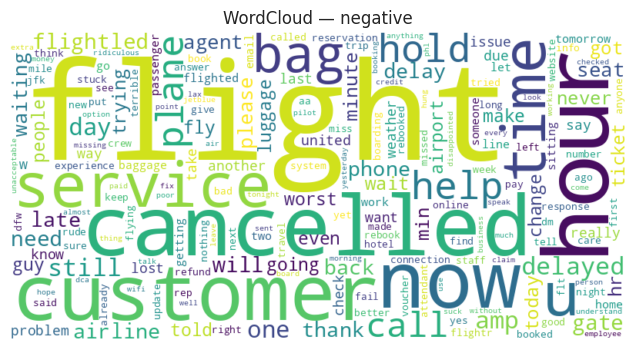

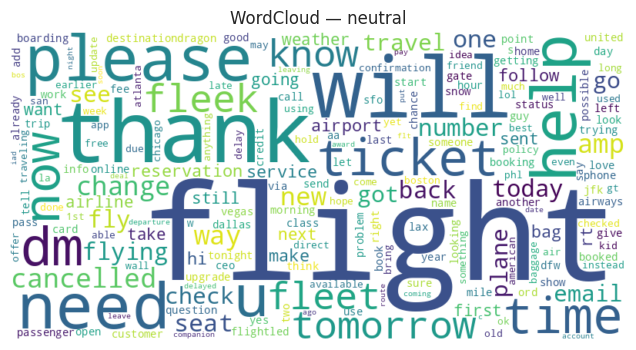

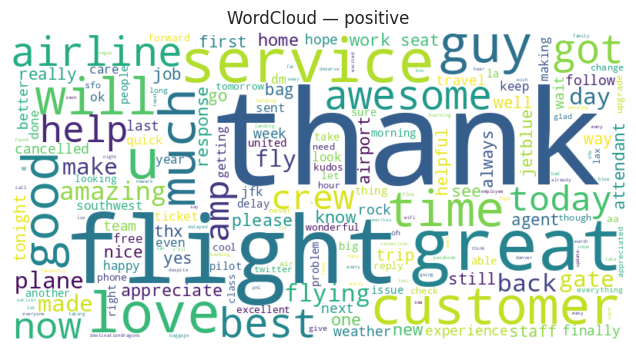

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, title=None):
    wc = WordCloud(width=800, height=400, background_color='white',
                   stopwords=STOPWORDS.union(set()), collocations=False).generate(" ".join(text))
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# overall
plot_wordcloud(df['clean'].dropna(), title="WordCloud — All tweets")

# per class
for lbl in df['label'].value_counts().index:
    txts = df[df['label']==lbl]['clean'].dropna().tolist()
    plot_wordcloud(txts, title=f"WordCloud — {lbl}")


**Text Preprocessing**

In [ ]:
# =========================
# Text preprocessing pipeline
# 12 steps: cleaning, negation handling, tokenization, lemmatization, stopwords, etc.
# =========================

# Install / download required packages
!pip install -q spacy nltk emoji
!python -m spacy download en_core_web_sm >/dev/null 2>&1

import re
import string
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.corpus import stopwords
import emoji
from collections import defaultdict

# NLTK downloads (if not present)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# load spaCy English model
nlp = spacy.load("en_core_web_sm", disable=["parser","ner"])  # we only need tokenizer/lemmatizer

# basic stopwords set
stop_words = set(stopwords.words('english'))

# a small contractions dictionary for common contractions (extendable)
CONTRACTIONS = {
    "n't":" not", "'s":" is", "'re":" are", "'ve":" have", "'ll":" will",
    "'d":" would", "won't":"will not", "can't":"can not", "shan't":"shall not",
    "ain't":"is not", "i'm":"i am"
}
# Expand contractions helper (simple)
_contr_re = re.compile('(%s)' % '|'.join(map(re.escape, sorted(CONTRACTIONS.keys(), key=lambda x:-len(x)))))

def expand_contractions(text):
    def replace(match):
        return CONTRACTIONS[match.group(0)]
    return _contr_re.sub(replace, text)

# emoji removal helper (keeps basic punctuation etc.)
def remove_emoji(text):
    return emoji.replace_emoji(text, replace=' ')  # replace with space

# remove non-ascii helper
def remove_non_ascii(text):
    return text.encode("ascii", errors="ignore").decode()

# negation handling: prefix next N tokens with "not_"
NEGATION_WORDS = set([
    "no","not","never","n't","cannot","cant","without","neither","nor","none","nobody","nowhere"
])
def apply_negation_marking(tokens, window=3):
    """
    tokens: list of tokens (strings)
    window: how many following tokens to mark as negated
    returns list of tokens with negations marked: e.g., "not good" -> "not_good"
    """
    out = []
    i = 0
    L = len(tokens)
    while i < L:
        t = tokens[i]
        lower = t.lower()
        if lower in NEGATION_WORDS:
            # mark next `window` tokens that are alphabetic (not punctuation)
            out.append("NOT_NEG")  # keep marker
            j = 1
            marked = 0
            while i + j < L and marked < window:
                cand = tokens[i + j]
                if re.match(r'^[A-Za-z0-9]+$', cand):
                    out.append("not_" + cand)
                    marked += 1
                else:
                    out.append(cand)
                j += 1
            i = i + j
        else:
            out.append(t)
            i += 1
    # remove the explicit marker token "NOT_NEG" if you prefer; we can keep or drop
    return [t for t in out if t != "NOT_NEG"]

# main cleaning function that applies many steps
def preprocess_text(text, do_lemmatize=True, do_negation=True, remove_stopwords=True, min_token_length=2):
    """
    Returns dict with:
      - 'clean_tokens': list of cleaned tokens (after lemmatization if chosen)
      - 'clean_text': joined cleaned string
    """
    if pd.isna(text):
        return {"clean_tokens": [], "clean_text": ""}

    s = str(text)

    # 1) normalize whitespace, lowercasing
    s = s.strip()

    # 2) expand contractions
    s = expand_contractions(s.lower())

    # 3) remove emojis and non-ascii
    s = remove_emoji(s)
    s = remove_non_ascii(s)

    # 4) remove URLs
    s = re.sub(r'http\S+|www\.\S+', ' ', s)

    # 5) handle mentions and hashtags:
    #    - remove @mentions entirely
    #    - convert #hashtag to hashtag word (remove '#')
    s = re.sub(r'@\w+', ' ', s)
    s = re.sub(r'#', ' ', s)

    # 6) remove punctuation
    #    replace punctuation with spaces so tokens split cleanly
    s = re.sub(r'[' + re.escape(string.punctuation) + r']', ' ', s)

    # 7) remove digits / standalone numbers
    s = re.sub(r'\b\d+\b', ' ', s)

    # collapse multiple spaces
    s = re.sub(r'\s+', ' ', s).strip()

    # 8) tokenize using spaCy (gives better tokenization and enriches for lemmatization)
    doc = nlp(s)

    tokens = [tok.text for tok in doc]

    # 9) negation marking
    if do_negation:
        tokens = apply_negation_marking(tokens, window=3)

    processed_tokens = []
    for tok in tokens:
        # normalize token (lowercase)
        t = tok.lower().strip()
        if t == "" or t.isspace():
            continue
        # drop purely punctuation (should be none)
        if all(ch in string.punctuation for ch in t):
            continue
        # drop if numeric
        if re.fullmatch(r'\d+', t):
            continue
        # remove stopwords
        if remove_stopwords and t in stop_words:
            continue
        # lemmatize token (spaCy's lemmatizer)
        if do_lemmatize:
            # create a small spaCy doc for token to get lemma_
            td = nlp(t)
            lemma = td[0].lemma_
            if lemma and lemma != '-PRON-':
                t = lemma.lower()
        # drop short tokens
        if len(t) < min_token_length:
            continue
        processed_tokens.append(t)

    # 10) final cleaning: remove any leftover artifacts, collapse repeated tokens if desired
    # join tokens back to string
    clean_text = " ".join(processed_tokens)
    return {"clean_tokens": processed_tokens, "clean_text": clean_text}


# ---------- Apply pipeline to dataframe (vectorized-ish) ----------
# Making sure df exists
if 'df' not in globals():
    raise RuntimeError("DataFrame `df` not found. Load your Tweets.csv into variable named df before running preprocessing cell.")

# 0) drop exact duplicates and NA in text
initial_shape = df.shape
df = df.drop_duplicates(subset=['text']).reset_index(drop=True)
df = df[~df['text'].isnull()].reset_index(drop=True)
after_drop_shape = df.shape
print(f"Rows before dedup/dropna: {initial_shape[0]}, after: {after_drop_shape[0]}")

# 1) create cleaned columns via apply (this is Python-level; small dataset so it's OK)
results = df['text'].apply(lambda x: preprocess_text(x, do_lemmatize=True, do_negation=True, remove_stopwords=True, min_token_length=2))

# expand results into columns
df['tokens'] = results.apply(lambda d: d['clean_tokens'])
df['preprocessed'] = results.apply(lambda d: d['clean_text'])

# 2) lengths & stats
df['raw_len_words'] = df['text'].str.split().map(len)
df['clean_len_words'] = df['tokens'].map(len)
df['raw_len_chars'] = df['text'].str.len()
df['clean_len_chars'] = df['preprocessed'].str.len()

print("\nSample preprocessed text:")
display(df[['text','preprocessed']].head(6))

print("\nLength stats (raw vs clean words):")
print(df[['raw_len_words','clean_len_words']].describe())

# 3) show basic counts
print("\nClass distribution after preprocessing:")
if 'label' in df.columns:
    print(df['label'].value_counts())

# optional: save preprocessed file for later steps
df.to_csv("tweets_preprocessed.csv", index=False)
print("\nSaved tweets_preprocessed.csv")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 23.3 MB/s eta 0:00:00
Rows before dedup/dropna: 14640, after: 14427

Sample preprocessed text:


text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   
5  @VirginAmerica seriously would pay $30 a fligh...   

                                        preprocessed  
0                                                say  
1               plus add commercial experience tacky  
2  not_today not_must not_mean need take another ...  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  
5  seriously would pay flight seat not_have not_t...


Length stats (raw vs clean words):
       raw_len_words  clean_len_words
count   14427.000000     14427.000000
mean       17.718791         9.057808
std         6.828828         3.985241
min         2.000000         0.000000
25%        13.000000         6.000000
50%        19.000000         9.000000
75%        23.000000        12.000000
max        36.000000        22.000000

Class distribution after preprocessing:
label
negative    9080
neutral     3057
positive    2290
Name: count, dtype: int64

Saved tweets_preprocessed.csv


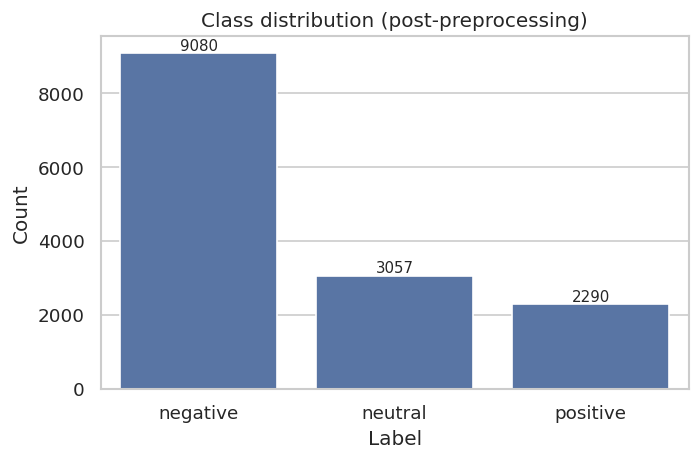

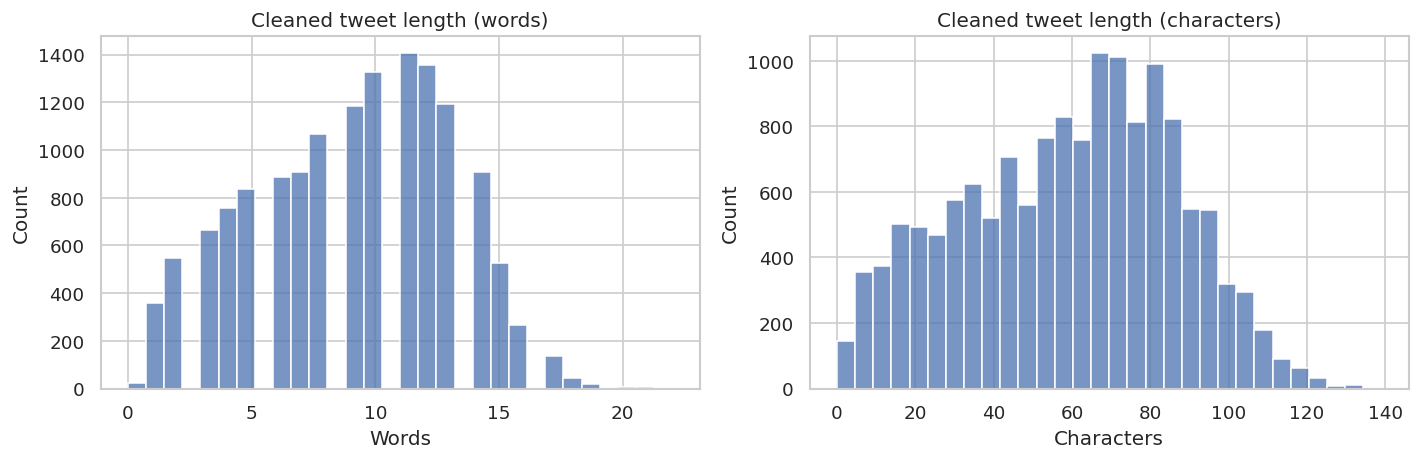

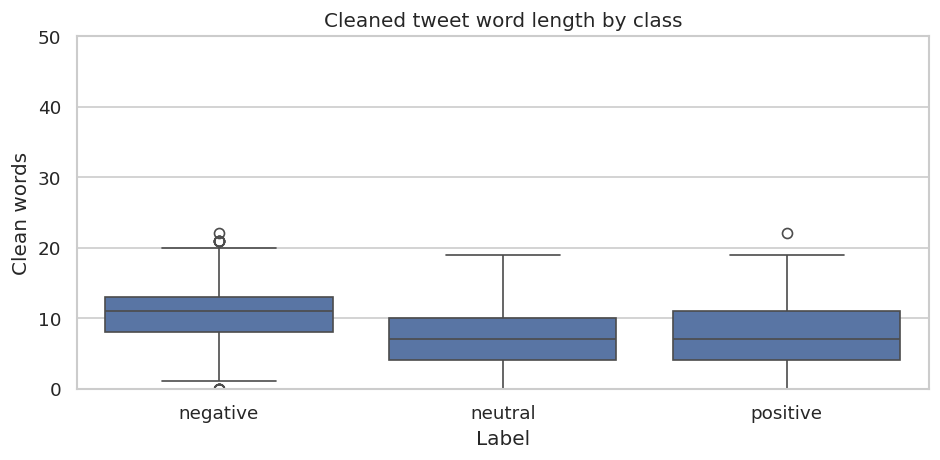

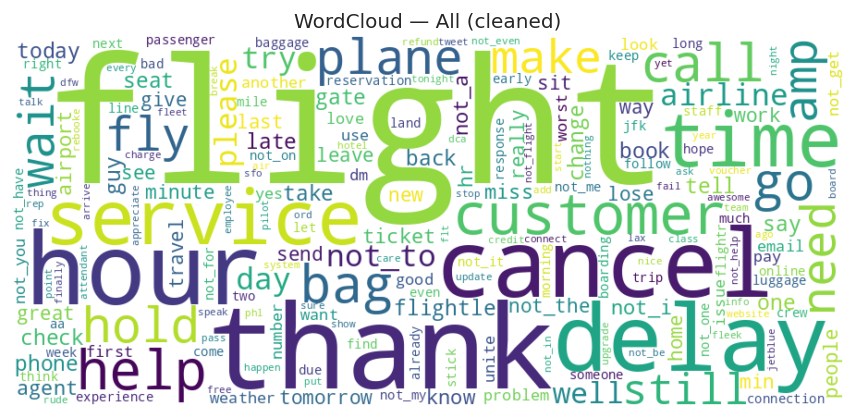

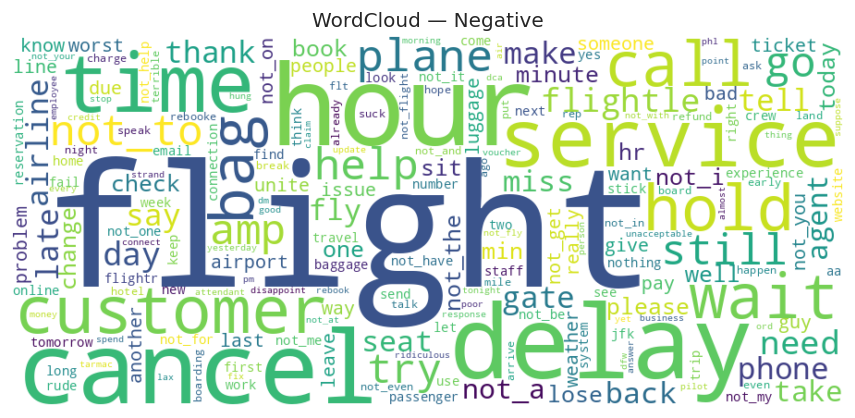

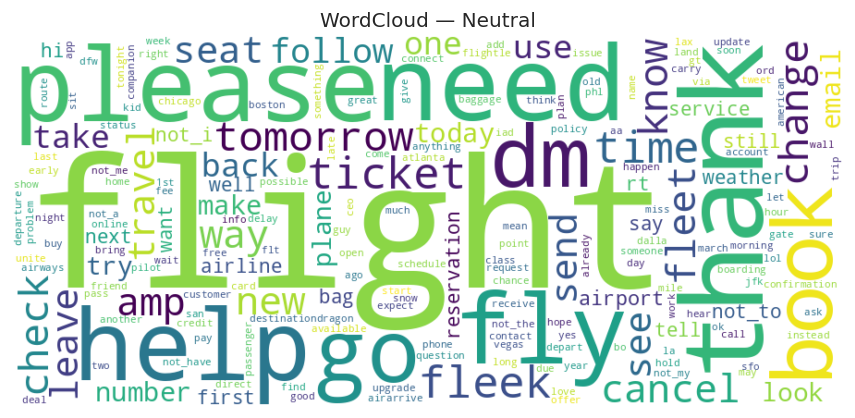

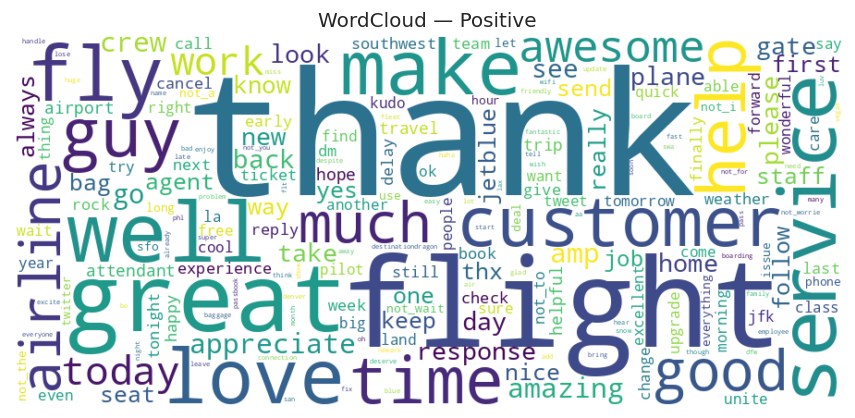

/tmp/ipython-input-2631171028.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=uni_counts, y=uni_terms, ax=axes[0], palette='mako')
/tmp/ipython-input-2631171028.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bi_counts, y=bi_terms, ax=axes[1], palette='crest')


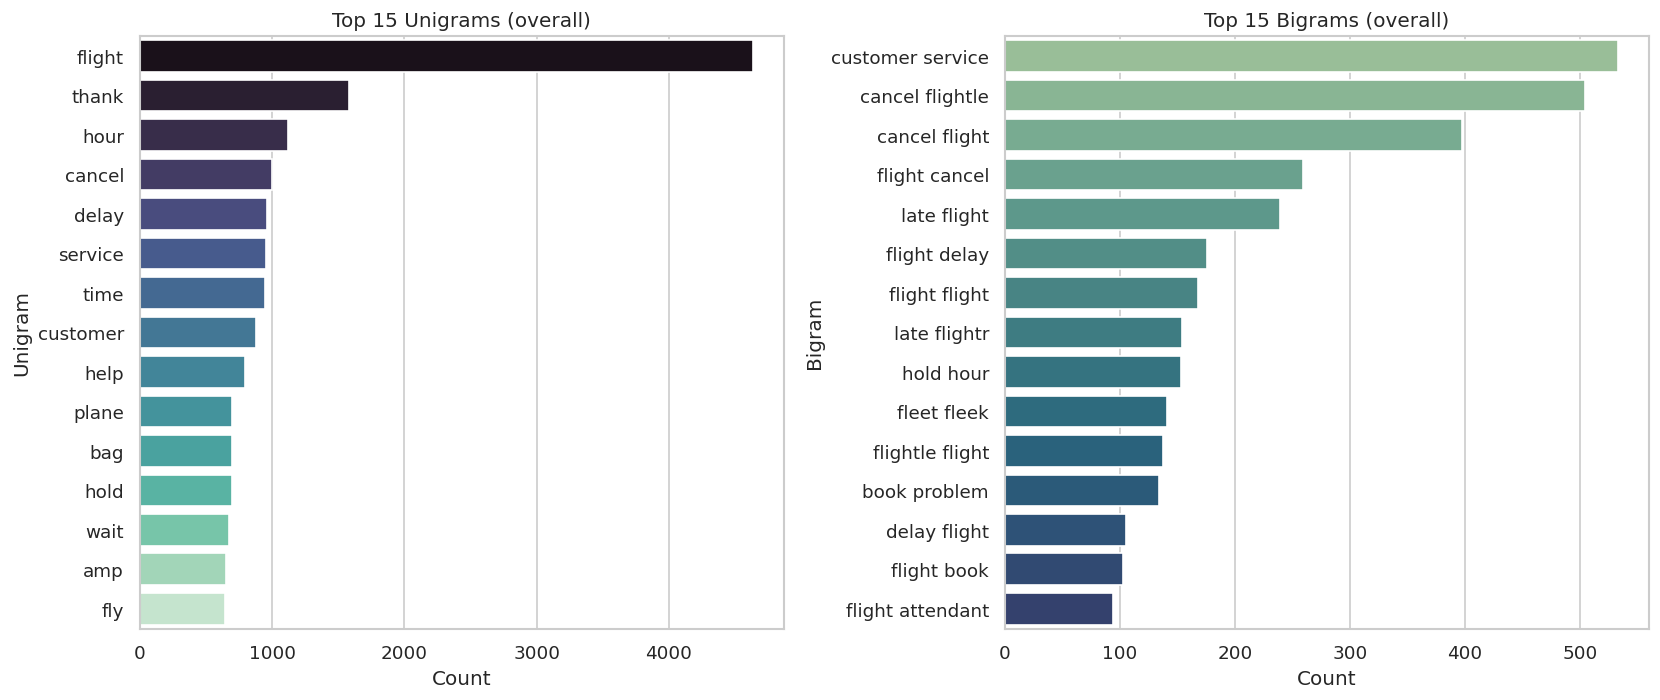

/tmp/ipython-input-2631171028.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=terms, ax=ax, palette='rocket')
/tmp/ipython-input-2631171028.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=terms, ax=ax, palette='rocket')
/tmp/ipython-input-2631171028.py:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=terms, ax=ax, palette='rocket')


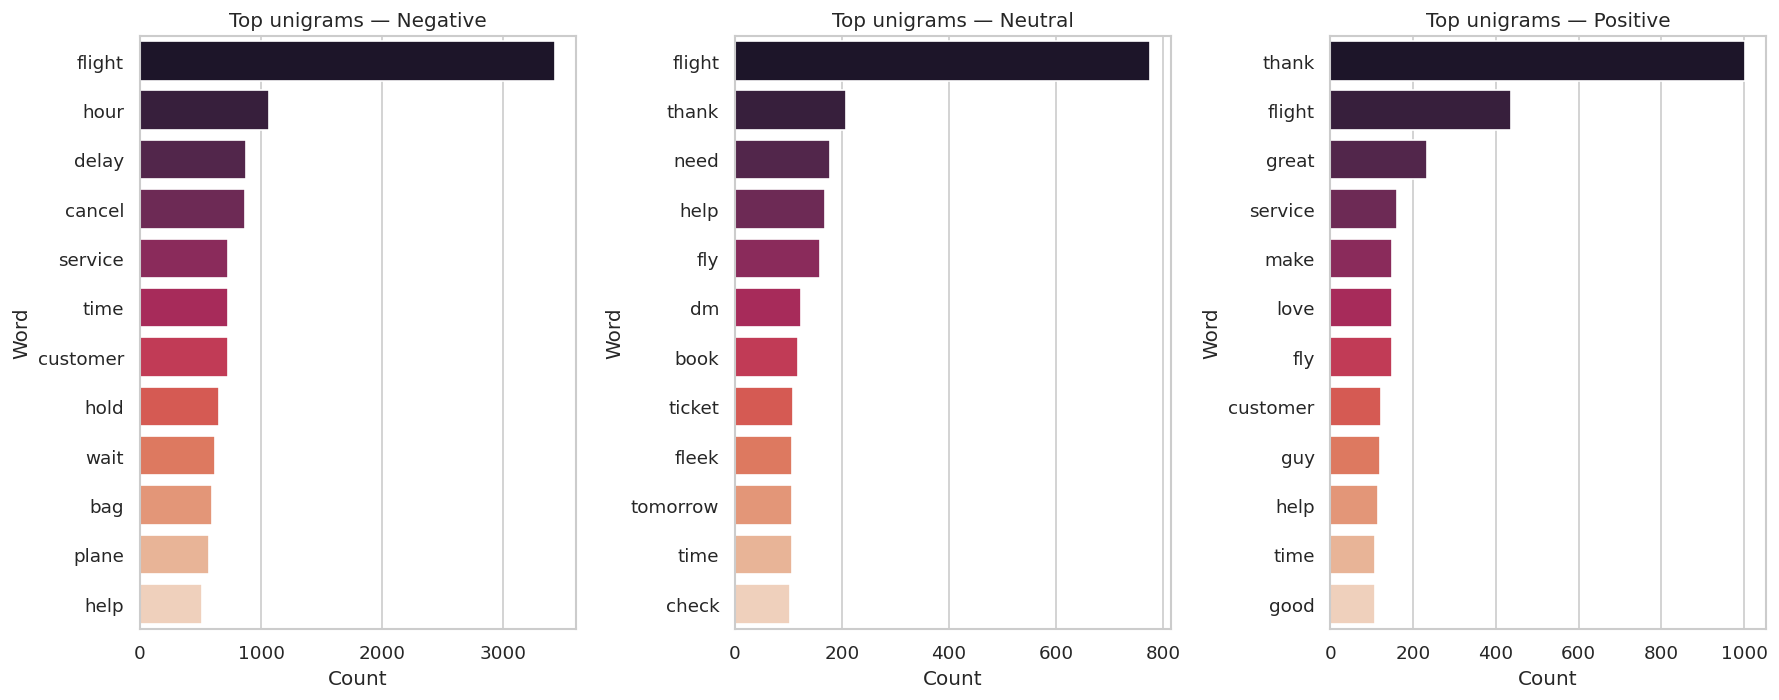

/tmp/ipython-input-2631171028.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='POS', data=pos_df.head(12), palette='magma')


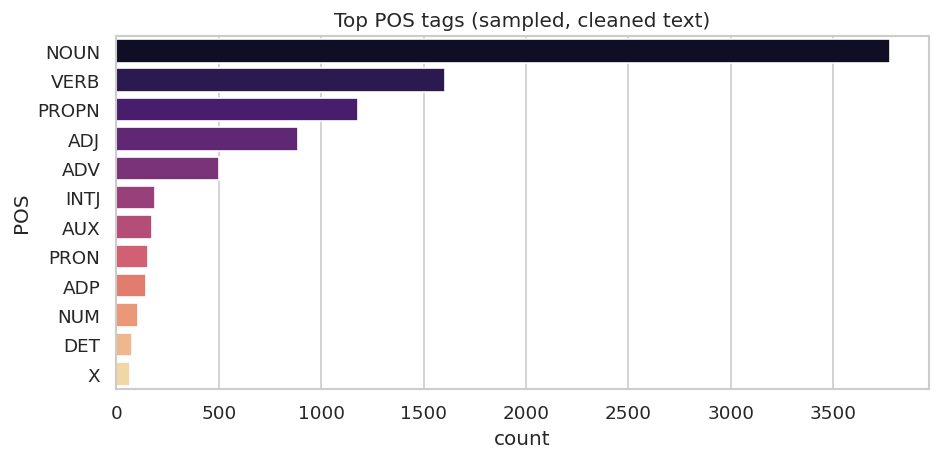

Saved figures to ./figures. You can download these for your paper.


In [ ]:
# ====== Visualize preprocessed results
!pip install -q wordcloud matplotlib seaborn scikit-learn spacy
# (spaCy model already installed earlier in preprocessing; if not, run: !python -m spacy download en_core_web_sm)

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import spacy
import os

sns.set(style="whitegrid")
plt.rcParams.update({'figure.dpi': 120})

# sanity checks
if 'df' not in globals():
    raise RuntimeError("DataFrame `df` not found. Run the preprocessing cell first so df has column 'preprocessed' and 'label'.")

# ensure required columns exist
for col in ['preprocessed','tokens','clean_len_words','clean_len_chars','label']:
    if col not in df.columns:
        raise RuntimeError(f"Column '{col}' missing from df. Run preprocessing first.")

# create output folder
os.makedirs("figures", exist_ok=True)

# ---- 1) Class distribution (after preprocessing) ----
plt.figure(figsize=(6,4))
order = df['label'].value_counts().index
ax = sns.countplot(data=df, x='label', order=order)
plt.title("Class distribution (post-preprocessing)")
plt.xlabel("Label"); plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig("figures/class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# ---- 2) Length distributions: cleaned word counts and characters ----
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['clean_len_words'], bins=30, kde=False, ax=axes[0])
axes[0].set_title("Cleaned tweet length (words)")
axes[0].set_xlabel("Words"); axes[0].set_ylabel("Count")

sns.histplot(df['clean_len_chars'], bins=30, kde=False, ax=axes[1])
axes[1].set_title("Cleaned tweet length (characters)")
axes[1].set_xlabel("Characters"); axes[1].set_ylabel("Count")

plt.tight_layout()
plt.savefig("figures/clean_length_histograms.png", dpi=300, bbox_inches="tight")
plt.show()

# Boxplot of cleaned word length by class
plt.figure(figsize=(8,4))
sns.boxplot(x='label', y='clean_len_words', data=df, order=order)
plt.ylim(0, 50)  # helps visualization by removing extreme tails
plt.title("Cleaned tweet word length by class")
plt.xlabel("Label"); plt.ylabel("Clean words")
plt.tight_layout()
plt.savefig("figures/length_box_by_class.png", dpi=300, bbox_inches="tight")
plt.show()

# ---- 3) WordCloud per class ----
def plot_wordcloud_from_series(series, title, filename=None):
    text = " ".join(series.dropna().astype(str).values)
    if not text.strip():
        print("No text for:", title); return
    wc = WordCloud(width=900, height=400, background_color='white', collocations=False,
                   stopwords=STOPWORDS).generate(text)
    plt.figure(figsize=(10,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

plot_wordcloud_from_series(df['preprocessed'], "WordCloud — All (cleaned)", "figures/wc_all.png")
for lbl in order:
    plot_wordcloud_from_series(df[df['label']==lbl]['preprocessed'], f"WordCloud — {lbl.capitalize()}", f"figures/wc_{lbl}.png")

# ---- 4) Top unigrams & bigrams (overall and per class) ----
def top_ngrams(series, ngram_range=(1,1), top_n=15, stop_words='english'):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words, min_df=2).fit(series)
    bag = vec.transform(series)
    sums = np.array(bag.sum(axis=0)).flatten()
    terms = np.array(vec.get_feature_names_out())
    idx = np.argsort(sums)[::-1][:top_n]
    return terms[idx], sums[idx]

# overall unigrams and bigrams
uni_terms, uni_counts = top_ngrams(df['preprocessed'], (1,1), top_n=15)
bi_terms, bi_counts = top_ngrams(df['preprocessed'], (2,2), top_n=15)

# plot side-by-side in first row
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.barplot(x=uni_counts, y=uni_terms, ax=axes[0], palette='mako')
axes[0].set_title("Top 15 Unigrams (overall)")
axes[0].set_xlabel("Count"); axes[0].set_ylabel("Unigram")

sns.barplot(x=bi_counts, y=bi_terms, ax=axes[1], palette='crest')
axes[1].set_title("Top 15 Bigrams (overall)")
axes[1].set_xlabel("Count"); axes[1].set_ylabel("Bigram")

plt.tight_layout()
plt.savefig("figures/top_ngrams_overall.png", dpi=300, bbox_inches="tight")
plt.show()

# per-class unigrams (plot in one row if 3 classes)
classes = list(order)
n_classes = len(classes)
fig, axes = plt.subplots(1, n_classes, figsize=(5*n_classes, 6))
if n_classes == 1:
    axes = [axes]

for ax, lbl in zip(axes, classes):
    terms, counts = top_ngrams(df[df['label']==lbl]['preprocessed'], (1,1), top_n=12)
    sns.barplot(x=counts, y=terms, ax=ax, palette='rocket')
    ax.set_title(f"Top unigrams — {lbl.capitalize()}")
    ax.set_xlabel("Count"); ax.set_ylabel("Word")
plt.tight_layout()
plt.savefig("figures/top_unigrams_by_class.png", dpi=300, bbox_inches="tight")
plt.show()

# ---- 5) POS tag quick distribution (optional, small sample) ----
try:
    nlp = spacy.load("en_core_web_sm", disable=["ner"])
    # POS distribution across sample of documents (to be fast)
    sample_texts = df['preprocessed'].dropna().sample(min(1000, len(df)), random_state=42).tolist()
    pos_counts = {}
    for doc in nlp.pipe(sample_texts, batch_size=100):
        for tok in doc:
            pos_counts[tok.pos_] = pos_counts.get(tok.pos_, 0) + 1
    pos_df = pd.DataFrame(sorted(pos_counts.items(), key=lambda x:x[1], reverse=True), columns=['POS','count'])
    plt.figure(figsize=(8,4))
    sns.barplot(x='count', y='POS', data=pos_df.head(12), palette='magma')
    plt.title("Top POS tags (sampled, cleaned text)")
    plt.tight_layout()
    plt.savefig("figures/pos_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()
except Exception as e:
    print("POS plotting skipped (spaCy error):", e)

print("Saved figures to ./figures. You can download these for your paper.")


In [ ]:
#  TF-IDF Feature Extraction (Unigrams + Bigrams)
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # keep it light for RAM efficiency
    ngram_range=(1, 2),     # unigrams + bigrams
    min_df=2,               # ignore rare words
    max_df=0.95,            # ignore overly common words
    stop_words='english'    # remove stopwords
)

# Fit-transform on training text
X_tfidf = tfidf.fit_transform(df['clean'])
y = df['label']

print("TF-IDF feature matrix created successfully!")
print("Shape:", X_tfidf.shape)


TF-IDF feature matrix created successfully!
Shape: (14427, 5000)


**Hybrid Feature Extraction (TF–IDF + RoBERTa)**

In [ ]:
# Hybrid Feature Extraction — TF-IDF + RoBERTa Embeddings
from sentence_transformers import SentenceTransformer
import numpy as np
from scipy.sparse import hstack

# Load pre-trained RoBERTa model (lightweight)
roberta_model = SentenceTransformer('all-MiniLM-L6-v2')  # Compact and fast RoBERTa-like model

# Encode tweets to contextual embeddings (dim = 384)
print("Encoding tweets using RoBERTa...")
X_roberta = roberta_model.encode(df['clean'], show_progress_bar=True)

print("RoBERTa embeddings shape:", X_roberta.shape)
print("TF-IDF shape:", X_tfidf.shape)

# Combine both feature sets (TF-IDF sparse + RoBERTa dense)
X_hybrid = hstack([X_tfidf, np.array(X_roberta)])

print("Hybrid feature matrix created successfully!")
print("Shape:", X_hybrid.shape)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding tweets using RoBERTa...


Batches:   0%|          | 0/451 [00:00<?, ?it/s]

RoBERTa embeddings shape: (14427, 384)
TF-IDF shape: (14427, 5000)
Hybrid feature matrix created successfully!
Shape: (14427, 5384)


**Model Training**

In [ ]:
# ===== Fixed Baseline NB experiments (handles COO sparse indexing) =====
!pip install -q joblib scikit-learn imbalanced-learn

import numpy as np, pandas as pd, time, joblib
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
import scipy.sparse as sp

# ---- User flags ----
RUN_GNB_ON_HYBRID = False   # Set True only if you have enough RAM and want to try GaussianNB on dense hybrid
RANDOM_STATE = 42

# ---- Sanity checks ----
if 'df' not in globals() or 'label' not in df.columns:
    raise RuntimeError("DataFrame `df` with 'label' column required.")
if 'X_tfidf' not in globals():
    raise RuntimeError("X_tfidf not found (run TF-IDF extraction).")
if 'X_roberta' not in globals():
    raise RuntimeError("X_roberta not found (run RoBERTa encoding).")
if 'X_hybrid' not in globals():
    print("Warning: X_hybrid not found. Hybrid experiment will be skipped unless X_hybrid is available.")

# If TF-IDF or hybrid are sparse, convert to CSR for safe indexing
if sp.issparse(X_tfidf):
    X_tfidf = X_tfidf.tocsr()
if 'X_hybrid' in globals() and sp.issparse(X_hybrid):
    X_hybrid = X_hybrid.tocsr()

# ---- Prepare labels ----
le = LabelEncoder()
y_all = le.fit_transform(df['label'].values)
class_names = list(le.classes_)
print("Classes:", class_names)
print("Counts:", Counter(y_all))

# ---- Stratified split (single holdout) ----
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=RANDOM_STATE)
train_idx, test_idx = next(sss.split(np.zeros(len(y_all)), y_all))

# ---- Slice representations consistently (CSR supports fancy indexing) ----
X_tfidf_train = X_tfidf[train_idx]
X_tfidf_test  = X_tfidf[test_idx]

X_roberta_arr = np.array(X_roberta)
X_roberta_train = X_roberta_arr[train_idx]
X_roberta_test  = X_roberta_arr[test_idx]

if 'X_hybrid' in globals():
    X_hybrid_full = X_hybrid
    X_hybrid_train = X_hybrid_full[train_idx]
    X_hybrid_test  = X_hybrid_full[test_idx]
else:
    X_hybrid_train = X_hybrid_test = None

y_train = y_all[train_idx]
y_test  = y_all[test_idx]
print("Train/test sizes:", len(y_train), len(y_test))
print("Train class counts:", Counter(y_train))
print("Test class counts:", Counter(y_test))

# ---- Compute sample weights to emulate class_weight='balanced' ----
n = len(y_train)
classes, counts = np.unique(y_train, return_counts=True)
class_weights = {c: n / (len(classes) * count) for c, count in zip(classes, counts)}
sample_weight = np.array([class_weights[y] for y in y_train])
print("Per-class weights used for sample_weight:", class_weights)

# ---- Helper: evaluate and print ----
def evaluate_and_report(name, model, X_test, y_test, label_names=class_names):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    print(f"\n---- {name} ----")
    print(f"Accuracy: {acc:.4f}  Macro-F1: {f1_macro:.4f}  Macro-Recall: {recall_macro:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_names, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    return {"model": name, "accuracy": acc, "f1_macro": f1_macro, "recall_macro": recall_macro, "precision_macro": precision_macro}

results = []

# --------------------------
# 1) ComplementNB on TF-IDF
# --------------------------
print("\n=== 1) ComplementNB on TF-IDF (recommended baseline for TF-IDF) ===")
clf_nb = ComplementNB()
t0 = time.time()
# ComplementNB supports sample_weight in .fit()
clf_nb.fit(X_tfidf_train, y_train, sample_weight=sample_weight)
train_time = time.time() - t0
print(f"Training time (s): {train_time:.2f}")
res1 = evaluate_and_report("ComplementNB_TFIDF", clf_nb, X_tfidf_test, y_test)
res1['train_time_s'] = train_time
results.append(res1)
joblib.dump(clf_nb, "ComplementNB_TFIDF.joblib")

# --------------------------
# 2) GaussianNB on RoBERTa (dense embeddings)
# --------------------------
print("\n=== 2) GaussianNB on RoBERTa embeddings (baseline for embeddings) ===")
gnb = GaussianNB()
t0 = time.time()
# GaussianNB.fit accepts sample_weight in sklearn >=0.24; if not, we can do manual weighting by replication (not recommended)
try:
    gnb.fit(X_roberta_train, y_train, sample_weight=sample_weight)
except TypeError:
    # older sklearn may not accept sample_weight for GaussianNB — fall back to fit without weights and print warning
    print("Warning: GaussianNB.fit does not accept sample_weight in this sklearn version. Training without sample weights.")
    gnb.fit(X_roberta_train, y_train)
train_time = time.time() - t0
print(f"Training time (s): {train_time:.2f}")
res2 = evaluate_and_report("GaussianNB_RoBERTa", gnb, X_roberta_test, y_test)
res2['train_time_s'] = train_time
results.append(res2)
joblib.dump(gnb, "GaussianNB_RoBERTa.joblib")

# --------------------------
# 3) (Optional) GaussianNB on Hybrid (dense) — CAREFUL with RAM
# --------------------------
if RUN_GNB_ON_HYBRID:
    if X_hybrid_train is None:
        print("\nHybrid data not available; skipping GNB on hybrid.")
    else:
        print("\n=== 3) GaussianNB on Hybrid (dense) — converting to dense, may use a lot of RAM ===")
        # convert to dense arrays (may OOM if hybrid is large)
        if sp.issparse(X_hybrid_train):
            Xh_train_dense = X_hybrid_train.toarray()
            Xh_test_dense = X_hybrid_test.toarray()
        else:
            Xh_train_dense = np.array(X_hybrid_train)
            Xh_test_dense = np.array(X_hybrid_test)
        gnb_h = GaussianNB()
        t0 = time.time()
        try:
            gnb_h.fit(Xh_train_dense, y_train, sample_weight=sample_weight)
        except TypeError:
            print("Warning: GaussianNB.fit does not accept sample_weight in this sklearn version. Training without sample weights.")
            gnb_h.fit(Xh_train_dense, y_train)
        train_time = time.time() - t0
        print(f"Training time (s): {train_time:.2f}")
        res3 = evaluate_and_report("GaussianNB_Hybrid", gnb_h, Xh_test_dense, y_test)
        res3['train_time_s'] = train_time
        results.append(res3)
        joblib.dump(gnb_h, "GaussianNB_Hybrid.joblib")
else:
    print("\nSkipped GaussianNB on hybrid (RUN_GNB_ON_HYBRID=False). This is recommended unless you have lots of RAM.")

# --------------------------
# Save results table
# --------------------------
res_df = pd.DataFrame(results).sort_values('f1_macro', ascending=False).reset_index(drop=True)
res_df.to_csv("baseline_nb_results.csv", index=False)
print("\nSaved baseline_nb_results.csv")
print(res_df)


Classes: ['negative', 'neutral', 'positive']
Counts: Counter({np.int64(0): 9080, np.int64(1): 3057, np.int64(2): 2290})
Train/test sizes: 11541 2886
Train class counts: Counter({np.int64(0): 7264, np.int64(1): 2445, np.int64(2): 1832})
Test class counts: Counter({np.int64(0): 1816, np.int64(1): 612, np.int64(2): 458})
Per-class weights used for sample_weight: {np.int64(0): np.float64(0.5295980176211453), np.int64(1): np.float64(1.5734151329243353), np.int64(2): np.float64(2.0998908296943233)}

=== 1) ComplementNB on TF-IDF (recommended baseline for TF-IDF) ===
Training time (s): 0.02

---- ComplementNB_TFIDF ----
Accuracy: 0.7460  Macro-F1: 0.6921  Macro-Recall: 0.7242
              precision    recall  f1-score   support

    negative     0.8872    0.7880    0.8346      1816
     neutral     0.5436    0.5703    0.5566       612
    positive     0.5911    0.8144    0.6850       458

    accuracy                         0.7460      2886
   macro avg     0.6740    0.7242    0.6921      2

In [ ]:
# ===== Train Logistic Regression on TF-IDF, RoBERTa, Hybrid =====
!pip install -q joblib scikit-learn imbalanced-learn

import time, joblib, numpy as np, pandas as pd
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
import scipy.sparse as sp

RANDOM_STATE = 42

# ---- Sanity checks ----
if 'df' not in globals() or 'label' not in df.columns:
    raise RuntimeError("DataFrame `df` with 'label' column required.")
if 'X_tfidf' not in globals():
    raise RuntimeError("X_tfidf not found. Run TF-IDF extraction first.")
if 'X_roberta' not in globals():
    raise RuntimeError("X_roberta not found. Run RoBERTa encoding first.")
if 'X_hybrid' not in globals():
    print("Warning: X_hybrid not found. Hybrid experiment will be skipped unless X_hybrid is available.")

# Ensure sparse matrices support fancy indexing
if sp.issparse(X_tfidf):
    X_tfidf = X_tfidf.tocsr()
if 'X_hybrid' in globals() and sp.issparse(X_hybrid):
    X_hybrid = X_hybrid.tocsr()

# ---- labels and split ----
le = LabelEncoder()
y_all = le.fit_transform(df['label'].values)
class_names = list(le.classes_)
print("Classes:", class_names)
print("Counts:", Counter(y_all))

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=RANDOM_STATE)
train_idx, test_idx = next(sss.split(np.zeros(len(y_all)), y_all))

# TF-IDF slices
X_tfidf_train = X_tfidf[train_idx]
X_tfidf_test  = X_tfidf[test_idx]

# RoBERTa slices (dense)
X_roberta_arr = np.array(X_roberta)
X_roberta_train = X_roberta_arr[train_idx]
X_roberta_test  = X_roberta_arr[test_idx]

# Hybrid slices (if available)
if 'X_hybrid' in globals():
    X_hybrid_train = X_hybrid[train_idx]
    X_hybrid_test  = X_hybrid[test_idx]
else:
    X_hybrid_train = X_hybrid_test = None

y_train = y_all[train_idx]
y_test  = y_all[test_idx]

print("Train/test sizes:", len(y_train), len(y_test))
print("Train class counts:", Counter(y_train))
print("Test class counts:", Counter(y_test))

# ---- helper eval fn ----
def evaluate_and_store(name, model, X_test, y_test, results_list):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    precision_macro = precision_score(y_test, y_pred, average='macro')
    print(f"\n---- {name} ----")
    print(f"Accuracy: {acc:.4f}  Macro-F1: {f1_macro:.4f}  Macro-Recall: {recall_macro:.4f}")
    print(classification_report(y_test, y_pred, target_names=class_names, digits=4))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    results_list.append({
        "model": name,
        "accuracy": acc,
        "f1_macro": f1_macro,
        "recall_macro": recall_macro,
        "precision_macro": precision_macro
    })

results = []

# ---- common LogisticRegression settings ----
lr_common = {
    "max_iter": 3000,
    "solver": "saga",
    "multi_class": "multinomial",
    "class_weight": "balanced",
    "n_jobs": -1,
    "random_state": RANDOM_STATE
}

# ---------------------
# 1) LogisticRegression on TF-IDF
# ---------------------
print("\n=== 1) LogisticRegression on TF-IDF ===")
lr_tfidf = LogisticRegression(**lr_common)
t0 = time.time()
lr_tfidf.fit(X_tfidf_train, y_train)
t_elapsed = time.time() - t0
print("Training time (s):", round(t_elapsed,3))
evaluate_and_store("LogReg_TFIDF", lr_tfidf, X_tfidf_test, y_test, results)
joblib.dump(lr_tfidf, "LogReg_TFIDF.joblib")

# ---------------------
# 2) LogisticRegression on RoBERTa embeddings (dense)
# ---------------------
print("\n=== 2) LogisticRegression on RoBERTa embeddings ===")
lr_roberta = LogisticRegression(**lr_common)
t0 = time.time()
lr_roberta.fit(X_roberta_train, y_train)
t_elapsed = time.time() - t0
print("Training time (s):", round(t_elapsed,3))
evaluate_and_store("LogReg_RoBERTa", lr_roberta, X_roberta_test, y_test, results)
joblib.dump(lr_roberta, "LogReg_RoBERTa.joblib")

# ---------------------
# 3) LogisticRegression on Hybrid
# ---------------------
if X_hybrid_train is None:
    print("\nHybrid not available — skipping LogisticRegression (Hybrid).")
else:
    print("\n=== 3) LogisticRegression on Hybrid (TF-IDF + RoBERTa) ===")
    lr_hybrid = LogisticRegression(**lr_common)
    t0 = time.time()
    lr_hybrid.fit(X_hybrid_train, y_train)
    t_elapsed = time.time() - t0
    print("Training time (s):", round(t_elapsed,3))
    evaluate_and_store("LogReg_Hybrid", lr_hybrid, X_hybrid_test, y_test, results)
    joblib.dump(lr_hybrid, "LogReg_Hybrid.joblib")

# ---- Save results ----
res_df = pd.DataFrame(results).sort_values("f1_macro", ascending=False).reset_index(drop=True)
res_df.to_csv("logreg_results.csv", index=False)
print("\nSaved logreg_results.csv")
print(res_df)


Classes: ['negative', 'neutral', 'positive']
Counts: Counter({np.int64(0): 9080, np.int64(1): 3057, np.int64(2): 2290})
Train/test sizes: 11541 2886
Train class counts: Counter({np.int64(0): 7264, np.int64(1): 2445, np.int64(2): 1832})
Test class counts: Counter({np.int64(0): 1816, np.int64(1): 612, np.int64(2): 458})

=== 1) LogisticRegression on TF-IDF ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time (s): 1.633

---- LogReg_TFIDF ----
Accuracy: 0.7581  Macro-F1: 0.7195  Macro-Recall: 0.7461
              precision    recall  f1-score   support

    negative     0.8960    0.7781    0.8329      1816
     neutral     0.5322    0.6895    0.6007       612
    positive     0.6841    0.7707    0.7248       458

    accuracy                         0.7581      2886
   macro avg     0.7041    0.7461    0.7195      2886
weighted avg     0.7852    0.7581    0.7665      2886

Confusion matrix:
 [[1413  313   90]
 [ 117  422   73]
 [  47   58  353]]

=== 2) LogisticRegression on RoBERTa embeddings ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time (s): 6.43

---- LogReg_RoBERTa ----
Accuracy: 0.7665  Macro-F1: 0.7270  Macro-Recall: 0.7605
              precision    recall  f1-score   support

    negative     0.9197    0.7753    0.8414      1816
     neutral     0.5523    0.7418    0.6332       612
    positive     0.6567    0.7642    0.7064       458

    accuracy                         0.7665      2886
   macro avg     0.7095    0.7605    0.7270      2886
weighted avg     0.8000    0.7665    0.7758      2886

Confusion matrix:
 [[1408  298  110]
 [  85  454   73]
 [  38   70  350]]

=== 3) LogisticRegression on Hybrid (TF-IDF + RoBERTa) ===


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training time (s): 10.388

---- LogReg_Hybrid ----
Accuracy: 0.7973  Macro-F1: 0.7557  Macro-Recall: 0.7788
              precision    recall  f1-score   support

    negative     0.9167    0.8243    0.8681      1816
     neutral     0.5978    0.7239    0.6548       612
    positive     0.7051    0.7882    0.7443       458

    accuracy                         0.7973      2886
   macro avg     0.7399    0.7788    0.7557      2886
weighted avg     0.8155    0.7973    0.8032      2886

Confusion matrix:
 [[1497  241   78]
 [  96  443   73]
 [  40   57  361]]

Saved logreg_results.csv
            model  accuracy  f1_macro  recall_macro  precision_macro
0   LogReg_Hybrid  0.797297  0.755750      0.778802         0.739879
1  LogReg_RoBERTa  0.766459  0.726967      0.760451         0.709544
2    LogReg_TFIDF  0.758143  0.719483      0.746123         0.704090


/tmp/ipython-input-557222823.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tidy, x='Metric', y='Score', hue='ModelLabel',


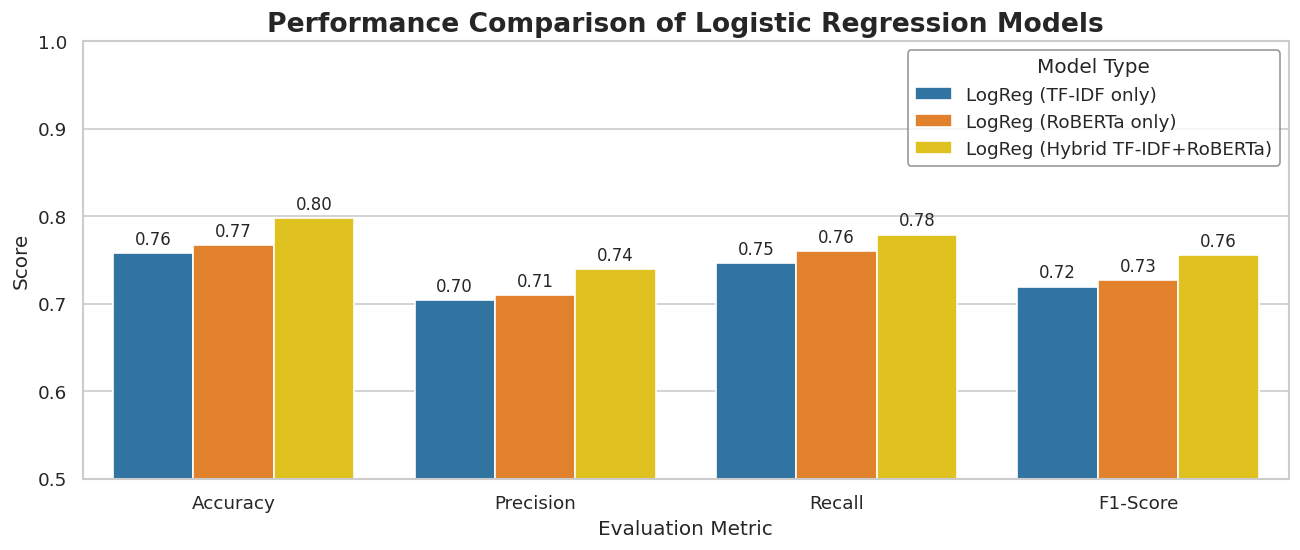

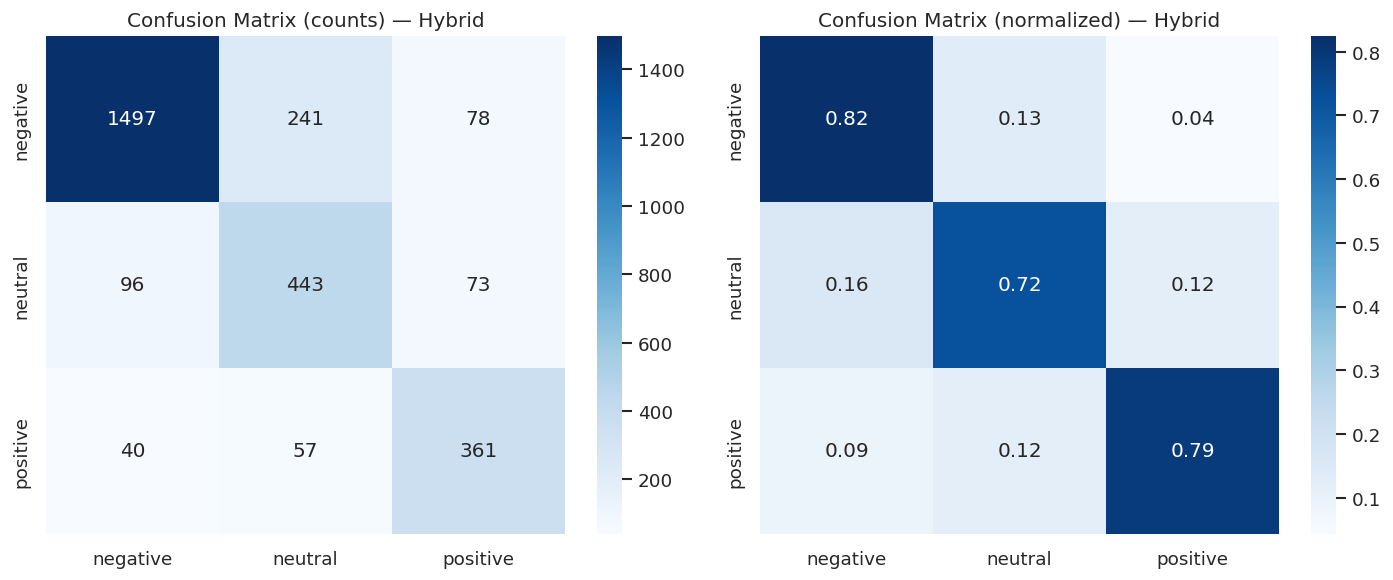

 Saved styled_logreg_comparison.png (and confusion matrix if generated).


In [ ]:
# ===== Confusion matrix + styled grouped bar chart (TF-IDF vs RoBERTa vs Hybrid) =====
import os, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# ----- Load results dataframe (try in-memory first, then file) -----
if 'res_df' in globals():
    results_df = res_df.copy()
elif os.path.exists("logreg_results.csv"):
    results_df = pd.read_csv("logreg_results.csv")
else:
    raise RuntimeError("Results DataFrame not found. Ensure `res_df` or 'logreg_results.csv' exists.")

# Normalize expected model names and desired plotting order
expected_order = ["LogReg_TFIDF", "LogReg_RoBERTa", "LogReg_Hybrid"]
results_df['model'] = results_df['model'].astype(str)

plot_models = [m for m in expected_order if m in results_df['model'].values]
if len(plot_models) < 3:
    plot_models = list(results_df['model'].values[:3])

plot_df = results_df.set_index('model').loc[plot_models].copy()

# ----- Ensure all required metrics -----
metrics_needed = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
for m in metrics_needed:
    if m not in plot_df.columns:
        plot_df[m] = np.nan

# ----- Build tidy DataFrame (replaces deprecated append()) -----
records = []
metric_map = [('accuracy','Accuracy'), ('precision_macro','Precision'),
              ('recall_macro','Recall'), ('f1_macro','F1-Score')]
for model_key in plot_df.index:
    for col, label in metric_map:
        val = float(plot_df.loc[model_key, col])
        records.append({'Model': model_key, 'Metric': label, 'Score': val})

tidy = pd.DataFrame.from_records(records)

# rename model keys to friendly labels for legend & plotting
friendly = {
    plot_models[0]: "LogReg (TF-IDF only)",
    plot_models[1] if len(plot_models)>1 else plot_models[0]: "LogReg (RoBERTa only)",
    plot_models[2] if len(plot_models)>2 else (plot_models[0] if len(plot_models)>0 else "Hybrid"): "LogReg (Hybrid TF-IDF+RoBERTa)"
}
tidy['ModelLabel'] = tidy['Model'].map(friendly)

# ordering and colors (blue, orange, gold)
model_order = list(friendly.values())
metric_order = ["Accuracy","Precision","Recall","F1-Score"]
colors = ["#1f77b4", "#ff7f0e", "#ffd700"]  # blue, orange, gold

# --- Grouped bar chart ---
plt.figure(figsize=(11,5))
ax = sns.barplot(data=tidy, x='Metric', y='Score', hue='ModelLabel',
                 order=metric_order, hue_order=model_order,
                 palette=colors, ci=None)

ax.set_ylim(0.5, 1.0)
ax.set_ylabel("Score")
ax.set_xlabel("Evaluation Metric")
ax.set_title("Performance Comparison of Logistic Regression Models", fontsize=16, weight='bold')

leg = ax.legend(title="Model Type", loc='upper right', frameon=True)
leg.get_frame().set_edgecolor('gray')

# annotate bars with scores
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height): continue
    ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10, xytext=(0,3), textcoords='offset points')

plt.tight_layout(rect=[0,0,1,0.95])
plt.savefig("styled_logreg_comparison.png", dpi=300)
plt.show()

# --- Confusion Matrix for Hybrid model  ---
try:
    if 'lr_hybrid' in globals():
        hybrid_model = lr_hybrid
    else:
        hybrid_model = None
        for fname in ["LogReg_Hybrid.joblib", "LogReg_Hybrid.pkl"]:
            if os.path.exists(fname):
                hybrid_model = joblib.load(fname); break
    if hybrid_model is not None and 'X_hybrid_test' in globals() and 'y_test' in globals():
        cm = confusion_matrix(y_test, hybrid_model.predict(X_hybrid_test), labels=np.unique(y_test))
        cm_norm = cm.astype(float)/cm.sum(axis=1)[:,None]
        fig, axes = plt.subplots(1,2, figsize=(12,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                    xticklabels=(le.classes_ if 'le' in globals() else None),
                    yticklabels=(le.classes_ if 'le' in globals() else None))
        axes[0].set_title("Confusion Matrix (counts) — Hybrid")
        sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', ax=axes[1],
                    xticklabels=(le.classes_ if 'le' in globals() else None),
                    yticklabels=(le.classes_ if 'le' in globals() else None))
        axes[1].set_title("Confusion Matrix (normalized) — Hybrid")
        plt.tight_layout()
        plt.savefig("confusion_hybrid_multi.png", dpi=300)
        plt.show()
except Exception as e:
    print("Skipping confusion-matrix replot (not critical). Reason:", e)

print(" Saved styled_logreg_comparison.png (and confusion matrix if generated).")


**Roc Curve**

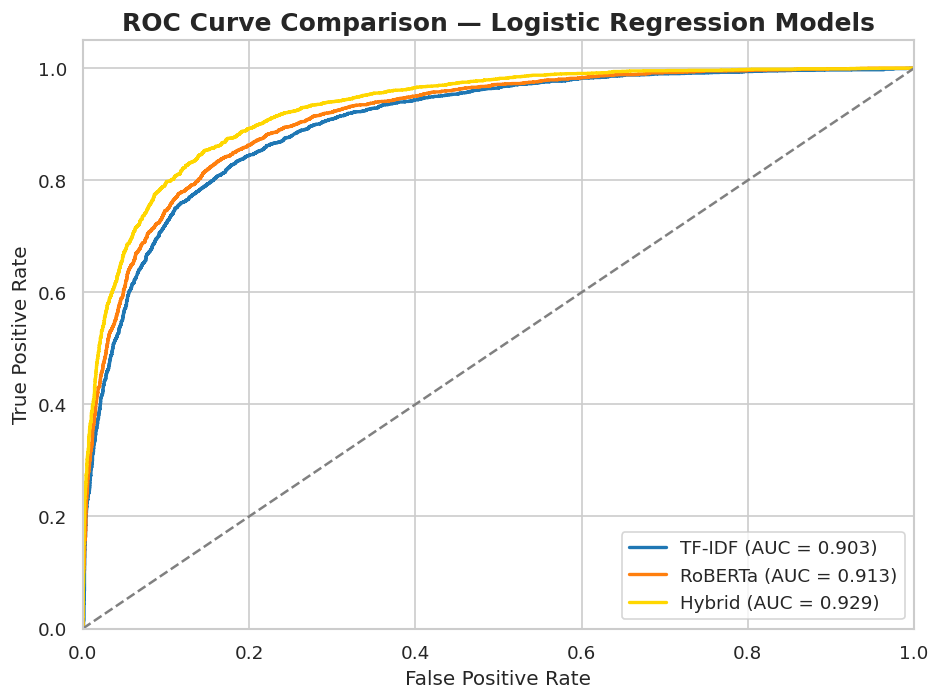

 Saved logreg_roc_comparison.png


In [ ]:
# ===== ROC Curves for Logistic Regression Models (TF-IDF, RoBERTa, Hybrid) =====
import numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize
import joblib, os

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

# ---- Ensure we have label encoder and test labels ----
if 'le' not in globals() or not hasattr(le, 'classes_'):
    raise RuntimeError("LabelEncoder `le` with fitted classes_ not found. Please re-run the cell that encodes y_all.")
if 'y_test' not in globals():
    raise RuntimeError("`y_test` not found. Please re-run the train/test split cell.")

n_classes = len(le.classes_)
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# ---- Load models (if not in memory) ----
def load_model_if_missing(var_name, file_pattern):
    if var_name in globals():
        return globals()[var_name]
    for fname in [file_pattern, f"{file_pattern}.joblib", f"{file_pattern}.pkl"]:
        if os.path.exists(fname):
            print(f"Loaded {var_name} from {fname}")
            return joblib.load(fname)
    raise FileNotFoundError(f"Could not find model file for {var_name}")

lr_tfidf = load_model_if_missing("lr_tfidf", "LogReg_TFIDF")
lr_roberta = load_model_if_missing("lr_roberta", "LogReg_RoBERTa")
lr_hybrid = load_model_if_missing("lr_hybrid", "LogReg_Hybrid")

# ---- Prepare prediction probabilities ----
y_score_tfidf = lr_tfidf.predict_proba(X_tfidf_test)
y_score_roberta = lr_roberta.predict_proba(X_roberta_test)
y_score_hybrid = lr_hybrid.predict_proba(X_hybrid_test)

# ---- Plot multi-class ROC for each model ----
plt.figure(figsize=(8,6))
colors = {"TF-IDF":"#1f77b4", "RoBERTa":"#ff7f0e", "Hybrid":"#ffd700"}

for model_name, y_score in {
    "TF-IDF": y_score_tfidf,
    "RoBERTa": y_score_roberta,
    "Hybrid": y_score_hybrid
}.items():
    # Compute micro-averaged ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[model_name],
             lw=2, label=f"{model_name} (AUC = {roc_auc:.3f})")

# Random baseline line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison — Logistic Regression Models", fontsize=15, weight='bold')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("logreg_roc_comparison.png", dpi=300)
plt.show()

print(" Saved logreg_roc_comparison.png")


**Different Machine Learning Models**

Train shape: (11541, 5384) Test shape: (2886, 5384)
Train label counts: Counter({np.int64(0): 7264, np.int64(1): 2445, np.int64(2): 1832})
Test label counts: Counter({np.int64(0): 1816, np.int64(1): 612, np.int64(2): 458})
Per-class sample weights (for XGB): {np.int64(0): np.float64(0.5295980176211453), np.int64(1): np.float64(1.5734151329243353), np.int64(2): np.float64(2.0998908296943233)}

=== Training LogisticRegression ===
Training time (s): 10.29

---- LogisticRegression ----
Accuracy: 0.7973  Macro-F1: 0.7557  Macro-Recall: 0.7788

Classification report:
              precision    recall  f1-score   support

           0     0.9167    0.8243    0.8681      1816
           1     0.5978    0.7239    0.6548       612
           2     0.7051    0.7882    0.7443       458

    accuracy                         0.7973      2886
   macro avg     0.7399    0.7788    0.7557      2886
weighted avg     0.8155    0.7973    0.8032      2886

Confusion matrix:
[[1497  241   78]
 [  96  443   7

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:10:21] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training time (s): 243.32

---- XGBoost ----
Accuracy: 0.8004  Macro-F1: 0.7385  Macro-Recall: 0.7283

Classification report:
              precision    recall  f1-score   support

           0     0.8635    0.8921    0.8776      1816
           1     0.6388    0.6356    0.6372       612
           2     0.7506    0.6572    0.7008       458

    accuracy                         0.8004      2886
   macro avg     0.7510    0.7283    0.7385      2886
weighted avg     0.7980    0.8004    0.7985      2886

Confusion matrix:
[[1620  152   44]
 [ 167  389   56]
 [  89   68  301]]
Saved model: XGBoost_hybrid.joblib

Saved hybrid_model_results.csv

                model  accuracy  f1_macro  recall_macro  train_time_s
0  LogisticRegression  0.797297  0.755750      0.778802        10.294
1           LinearSVC  0.797644  0.746999      0.752939         5.071
2             XGBoost  0.800416  0.738524      0.728299       243.317
3        DecisionTree  0.631670  0.537889      0.540810        28.243


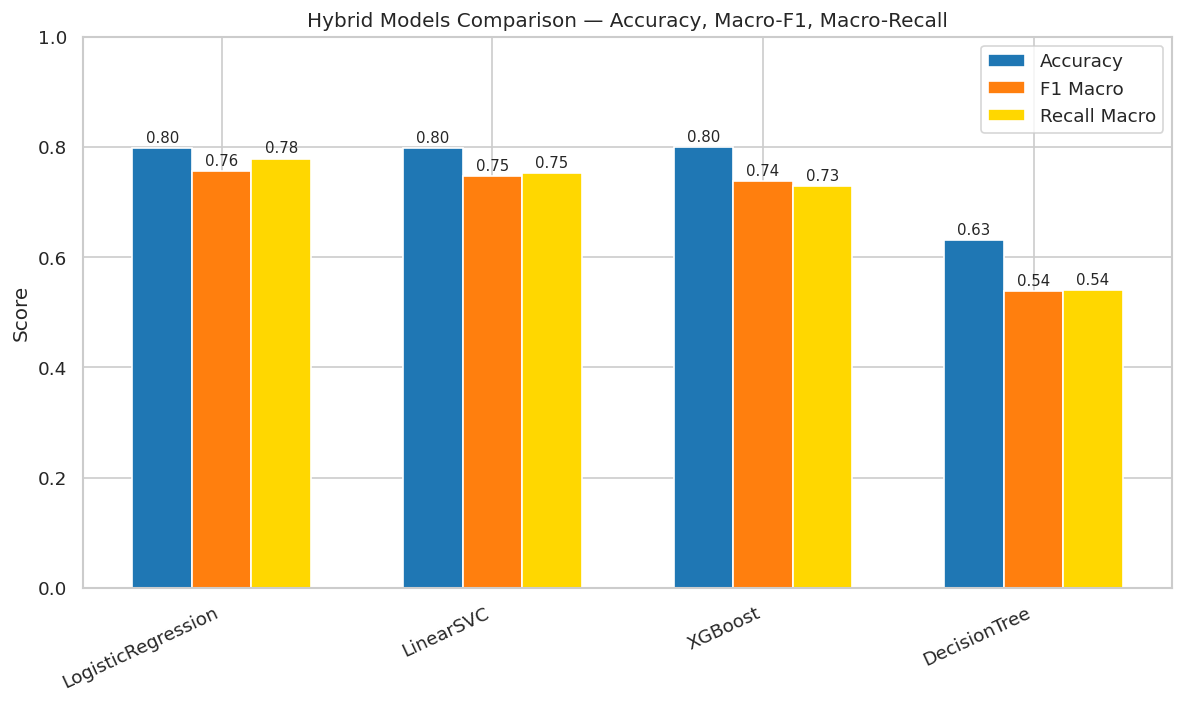

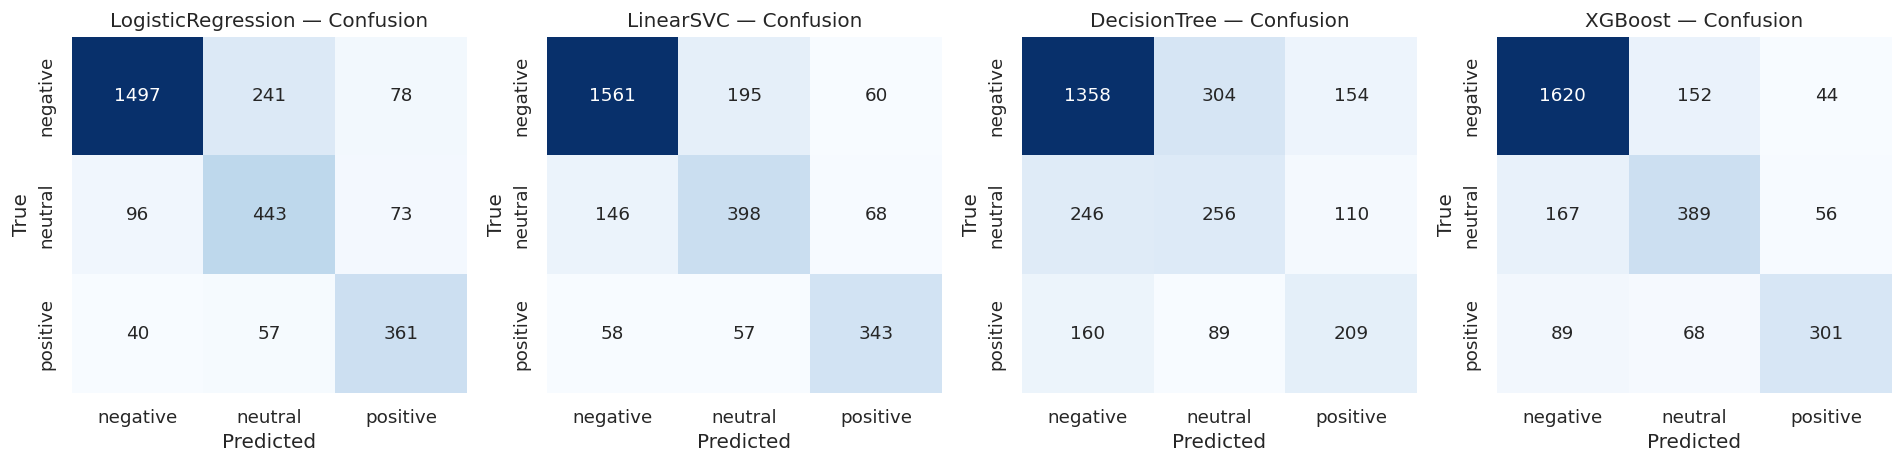

In [ ]:
# ===== Train & compare SVM (LinearSVC), DecisionTree, LogisticRegression, XGBoost on HYBRID =====
!pip install -q xgboost joblib

import time, os, joblib, numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import scipy.sparse as sp

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 11})

# ---------- Sanity checks ----------
if 'X_hybrid_train' not in globals() or 'X_hybrid_test' not in globals():
    raise RuntimeError("X_hybrid_train / X_hybrid_test not found. Re-run the feature extraction & split cells first.")
if 'y_train' not in globals() or 'y_test' not in globals():
    raise RuntimeError("y_train / y_test not found. Re-run the train/test split cell first.")

# Optionally convert to CSR if COO (safer indexing)
if sp.issparse(X_hybrid_train) and not isinstance(X_hybrid_train, (sp.csr_matrix, sp.csc_matrix)):
    X_hybrid_train = X_hybrid_train.tocsr()
if sp.issparse(X_hybrid_test) and not isinstance(X_hybrid_test, (sp.csr_matrix, sp.csc_matrix)):
    X_hybrid_test = X_hybrid_test.tocsr()

# Print dataset sizes
print("Train shape:", X_hybrid_train.shape, "Test shape:", X_hybrid_test.shape)
print("Train label counts:", Counter(y_train))
print("Test label counts:", Counter(y_test))

# ---------- Compute sample weights from training labels (for XGB) ----------
n_train = len(y_train)
classes, counts = np.unique(y_train, return_counts=True)
class_weight_map = {c: n_train / (len(classes) * count) for c, count in zip(classes, counts)}
sample_weight = np.array([class_weight_map[y] for y in y_train])
print("Per-class sample weights (for XGB):", class_weight_map)

# ---------- Define models (use class_weight where relevant) ----------
models = {
    "LogisticRegression": LogisticRegression(max_iter=3000, solver='saga', class_weight='balanced', random_state=42, n_jobs=-1),
    "LinearSVC": LinearSVC(class_weight='balanced', max_iter=5000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    # For XGBoost: do not set class_weight; we'll supply sample_weight in fit
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, n_jobs=-1)
}

results = []

# Helper to get X and sample_weight for fit
def get_train_args(model_name):
    # XGB needs dense array
    if model_name == "XGBoost":
        if sp.issparse(X_hybrid_train):
            X_tr = X_hybrid_train.toarray()
            X_te = X_hybrid_test.toarray() if sp.issparse(X_hybrid_test) else X_hybrid_test
        else:
            X_tr = np.array(X_hybrid_train)
            X_te = np.array(X_hybrid_test)
        fit_kwargs = {"sample_weight": sample_weight}
    else:
        # other models can accept sparse
        X_tr = X_hybrid_train
        X_te = X_hybrid_test
        fit_kwargs = {}
    return X_tr, X_te, fit_kwargs

# ---------- Train loop ----------
for name, clf in models.items():
    print(f"\n=== Training {name} ===")
    X_tr, X_te, fit_kwargs = get_train_args(name)
    t0 = time.time()
    try:
        clf.fit(X_tr, y_train, **fit_kwargs)
    except TypeError:
        print(f"Warning: {name} did not accept fit kwargs {fit_kwargs}. Fitting without sample weights.")
        clf.fit(X_tr, y_train)
    train_time = time.time() - t0
    print(f"Training time (s): {train_time:.2f}")

    # Evaluate
    # get predicted labels
    # for XGBoost we used dense X_te already; for others X_te is possibly sparse
    if name == "XGBoost":
        y_pred = clf.predict(X_te)
    else:
        y_pred = clf.predict(X_te)

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average='macro')
    recm = recall_score(y_test, y_pred, average='macro')

    print(f"\n---- {name} ----")
    print(f"Accuracy: {acc:.4f}  Macro-F1: {f1m:.4f}  Macro-Recall: {recm:.4f}")
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Save model
    fname = f"{name}_hybrid.joblib"
    joblib.dump(clf, fname)
    print("Saved model:", fname)

    results.append({
        "model": name,
        "accuracy": acc,
        "f1_macro": f1m,
        "recall_macro": recm,
        "train_time_s": round(train_time, 3)
    })

# ---------- Save results dataframe ----------
res_df = pd.DataFrame(results).sort_values('f1_macro', ascending=False).reset_index(drop=True)
res_df.to_csv("hybrid_model_results.csv", index=False)
print("\nSaved hybrid_model_results.csv\n")
print(res_df)

# ---------- Visualization: grouped bar plot (Accuracy, Macro-F1, Macro-Recall) ----------
metrics = ['accuracy','f1_macro','recall_macro']
plot_df = res_df.set_index('model')[metrics]

plt.figure(figsize=(10,6))
bar_width = 0.22
x = np.arange(len(plot_df.index))

colors = ["#1f77b4", "#ff7f0e", "#ffd700"]  # blue, orange, gold for the three metrics

for i, metric in enumerate(metrics):
    plt.bar(x + (i-1)*bar_width, plot_df[metric].values, width=bar_width, label=metric.replace('_',' ').title(), color=colors[i])

plt.xticks(x, plot_df.index, rotation=25, ha='right')
plt.ylim(0,1)
plt.ylabel("Score")
plt.title("Hybrid Models Comparison — Accuracy, Macro-F1, Macro-Recall")
plt.legend(title="")
# annotate
for i in range(len(plot_df.index)):
    for j, metric in enumerate(metrics):
        val = plot_df.iloc[i][metric]
        plt.text(i + (j-1)*bar_width, val + 0.01, f"{val:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig("hybrid_models_comparison_bar.png", dpi=300)
plt.show()

# -------- show confusion matrix heatmaps for each model ----------
fig, axes = plt.subplots(1, len(models), figsize=(4*len(models), 4))
if len(models) == 1:
    axes = [axes]
for ax, row in zip(axes, results):
    name = row['model']
    clf = joblib.load(f"{name}_hybrid.joblib")
    # X_te_plot as dense for safety (works for all predictors)
    X_te_plot = X_hybrid_test.toarray() if sp.issparse(X_hybrid_test) else X_hybrid_test
    y_pred = clf.predict(X_te_plot) if (name == "XGBoost") else clf.predict(X_hybrid_test)
    cm = confusion_matrix(y_test, y_pred)
    # restore label names if LabelEncoder 'le' exists
    if 'le' in globals() and hasattr(le, 'classes_'):
        labels = le.classes_
    else:
        labels = np.unique(y_test)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    ax.set_title(f"{name} — Confusion")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.savefig("hybrid_confusion_matrices.png", dpi=300)
plt.show()


Loaded model from LogisticRegression_hybrid.joblib
Loaded model from LinearSVC_hybrid.joblib
Loaded model from XGBoost_hybrid.joblib
Loaded model from DecisionTree_hybrid.joblib
Computed per-class metrics for LogisticRegression
Computed per-class metrics for LinearSVC
Computed per-class metrics for XGBoost
Computed per-class metrics for DecisionTree


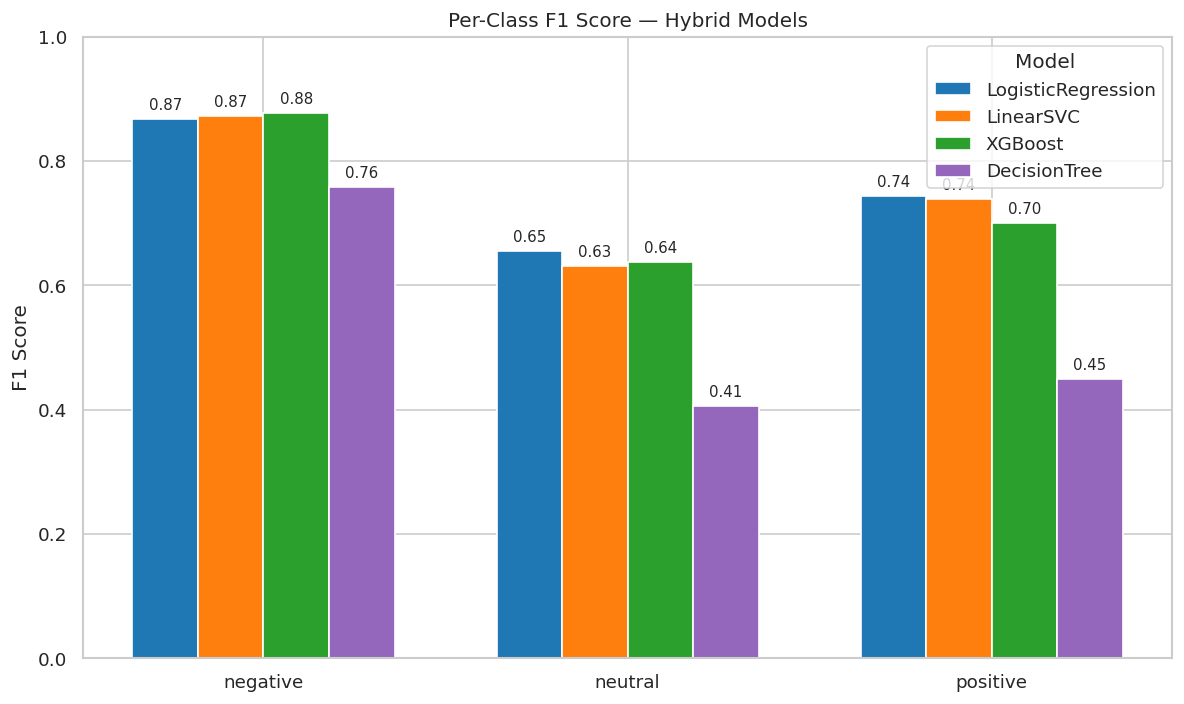


Per-class F1 table:
          LogisticRegression  LinearSVC  XGBoost  DecisionTree
negative               0.868      0.872    0.878         0.759
neutral                0.655      0.631    0.637         0.406
positive               0.744      0.738    0.701         0.449


In [ ]:
# Plot per-class F1 scores for Hybrid models
# Requirements: joblib, numpy, pandas, matplotlib, seaborn, sklearn
import os, joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
import scipy.sparse as sp

sns.set(style="whitegrid")
plt.rcParams.update({"font.size": 11})

# --- sanity checks ---
required_vars = ['X_hybrid_test', 'y_test']
for v in required_vars:
    if v not in globals():
        raise RuntimeError(f"Variable '{v}' not found. Re-run split/feature extraction cells to create it.")

X_test = X_hybrid_test
y_true = np.array(y_test)

# -- model names & fallback files (edit if your filenames differ) --
model_info = {
    "LogisticRegression": {"var": "LogisticRegression_hybrid", "file": "LogisticRegression_hybrid.joblib"},
    "LinearSVC": {"var": "LinearSVC_hybrid", "file": "LinearSVC_hybrid.joblib"},
    "XGBoost": {"var": "XGBoost_hybrid", "file": "XGBoost_hybrid.joblib"},
    "DecisionTree": {"var": "DecisionTree_hybrid", "file": "DecisionTree_hybrid.joblib"},
}

# load models (prefer in-memory variables, otherwise try joblib)
loaded_models = {}
for name, info in model_info.items():
    # check for variable in memory
    if info['var'] in globals():
        loaded_models[name] = globals()[info['var']]
        print(f"Using in-memory model: {info['var']}")
        continue
    # try joblib file
    if os.path.exists(info['file']):
        try:
            loaded_models[name] = joblib.load(info['file'])
            print(f"Loaded model from {info['file']}")
            continue
        except Exception as e:
            print(f"Failed loading {info['file']}: {e}")
    print(f"Model for {name} not found (skipping).")

if len(loaded_models) == 0:
    raise RuntimeError("No hybrid models found in memory or disk. Make sure model joblib files exist or models are in memory.")

# if X_test is sparse and some models require dense (XGBoost) convert on demand
def prepare_input_for_model(model_name, X):
    if model_name == "XGBoost":
        # XGBoost prefers dense numpy array
        if sp.issparse(X):
            return X.toarray()
        else:
            return np.asarray(X)
    else:
        # other sklearn models can accept sparse matrices
        return X

# retrieve class labels (human-friendly)
if 'le' in globals() and hasattr(le, 'classes_'):
    class_names = list(le.classes_)
else:
    # fallback: unique sorted labels from y_true
    unique = np.unique(y_true)
    class_names = [str(u) for u in unique]

# compute per-class f1 for each model
results = []
for name, model in loaded_models.items():
    X_for_model = prepare_input_for_model(name, X_test)
    try:
        y_pred = model.predict(X_for_model)
    except Exception:
        # fallback: try predicting on sparse/dense original
        try:
            y_pred = model.predict(X_test if not sp.issparse(X_test) else X_test.toarray())
        except Exception as e:
            print(f"Could not predict with {name}: {e}")
            continue

    pr, rc, f1s, sup = precision_recall_fscore_support(y_true, y_pred, labels=np.unique(y_true), zero_division=0)
    results.append({
        "model": name,
        "precision": pr,
        "recall": rc,
        "f1": f1s,
        "support": sup
    })
    print(f"Computed per-class metrics for {name}")

# prepare DataFrame for plotting: rows = classes, cols = models
models_order = list(loaded_models.keys())
classes_order = class_names

f1_matrix = pd.DataFrame(index=classes_order, columns=models_order, dtype=float)

# mapping between label indices returned by metrics and class_names:
# assume metrics returned in order np.unique(y_true). We'll map them by value if le used numeric mapping.
metric_labels = np.unique(y_true)

for res in results:
    model_name = res['model']
    f1_vals = res['f1']
    # metric_labels holds numeric labels order; map f1_vals to class_names by index
    for i, numeric_label in enumerate(metric_labels):
        # if le exists and class_names are strings, map accordingly
        try:
            class_label_name = class_names[list(metric_labels).index(numeric_label)]
        except Exception:
            class_label_name = str(numeric_label)
        # safer: if class_names are strings like 'negative' in same order as metric_labels,
        # assume class_names correspond to metric_labels order. If not, users should set 'le' earlier.
        # We'll try direct index mapping
        try:
            target_class = class_names[i]
        except Exception:
            target_class = str(metric_labels[i])
        f1_matrix.loc[target_class, model_name] = float(f1_vals[i])

# If some cells are NaN (due to mismatch), fill with 0
f1_matrix = f1_matrix.fillna(0.0)

# --- Plot grouped bar chart (per-class F1) ---
plt.figure(figsize=(10,6))
bar_width = 0.18
x = np.arange(len(classes_order))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd"]  # 4 distinct colors

for i, model_name in enumerate(models_order):
    vals = f1_matrix[model_name].values
    plt.bar(x + (i - (len(models_order)-1)/2.0)*bar_width, vals, width=bar_width, label=model_name, color=colors[i % len(colors)])

plt.xticks(x, classes_order, rotation=0)
plt.ylim(0, 1.0)
plt.ylabel("F1 Score")
plt.title("Per-Class F1 Score — Hybrid Models")
plt.legend(title="Model", loc="upper right")

# annotate bars
for i in range(len(classes_order)):
    for j, model_name in enumerate(models_order):
        val = f1_matrix.iloc[i, j]
        plt.text(i + (j - (len(models_order)-1)/2.0)*bar_width, val + 0.01, f"{val:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig("per_class_f1_hybrid_models.png", dpi=300)
plt.show()

# also print the numeric table for reporting
print("\nPer-class F1 table:")
print(f1_matrix.round(3))
